In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")   

# Xem thông tin chung
print(df.info())

# Xem thống kê cơ bản
print(df.describe())

# Kiểm tra số lượng giá trị null
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [2]:
# Loại bỏ các dòng trùng lặp hoàn toàn, giữ lại dòng đầu tiên
df = df.drop_duplicates(keep='first')

# Reset lại index để thứ tự đẹp và không bị lỗ số
df = df.reset_index(drop=True)

# Kiểm tra lại kết quả
print("Số dòng sau khi loại bỏ trùng lặp:", len(df))
print("Shape của DataFrame:", df.shape)

Số dòng sau khi loại bỏ trùng lặp: 283726
Shape của DataFrame: (283726, 31)


Class
0    283253
1       473
Name: count, dtype: int64

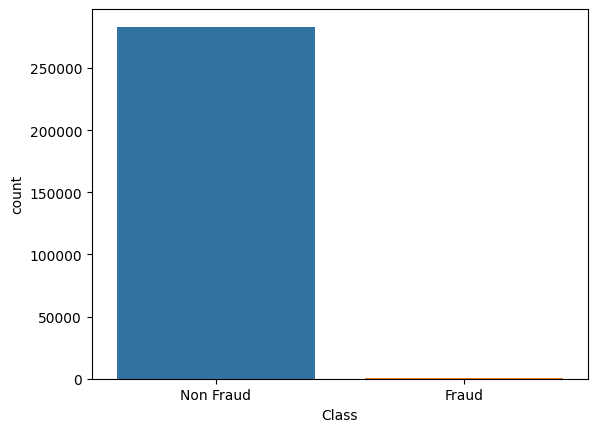

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Class', data=df)
plt.xticks([0,1], ['Non Fraud', 'Fraud']);

df['Class'].value_counts()

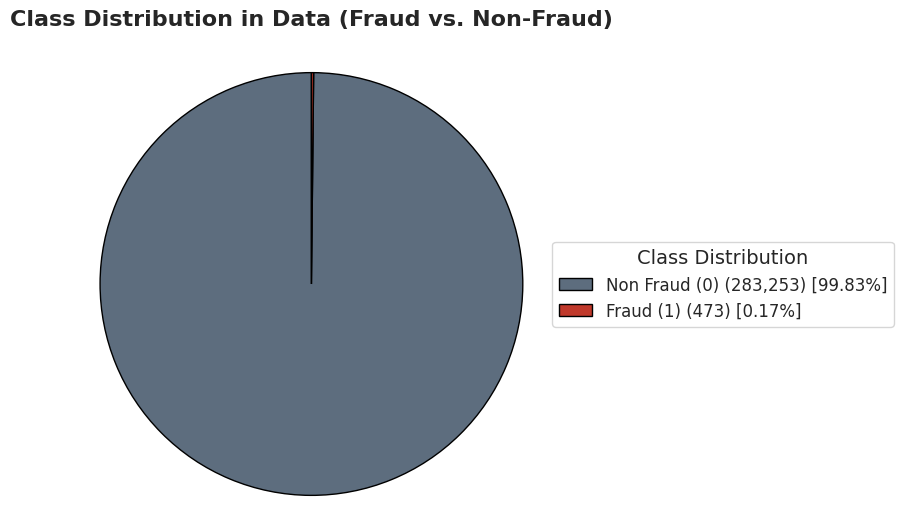

In [ ]:
data = {'Class': [0]*283253 + [1]*473} 
df = pd.DataFrame(data)

sns.set_style("whitegrid") 

# Lấy số lượng và tỷ lệ
counts = df['Class'].value_counts()
labels = ['Non Fraud (0)', 'Fraud (1)']
percentages = (counts / counts.sum() * 100).round(4) # Làm tròn 4 chữ số thập phân

colors = ['#5D6D7E', '#C0392B']  # Xám đá (Non Fraud) và Đỏ gạch (Fraud)

plt.figure(figsize=(6, 6))

# Vẽ biểu đồ Pie
wedges, texts = plt.pie(
    counts, 
    startangle=90, 
    colors=colors,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.0},
)

legend_labels = []
for i in range(len(labels)):
    # Định dạng chuỗi: Tên lớp (Số lượng) [Tỷ lệ %]
    line = f"{labels[i]} ({counts.iloc[i]:,}) [{percentages.iloc[i]:.2f}%]"
    legend_labels.append(line)

plt.legend(wedges, 
           legend_labels,
           title="Class Distribution",
           loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1), # Đặt legend ra ngoài vùng plot
           fontsize=12,
           title_fontsize=14)

plt.title('Class Distribution in Data (Fraud vs. Non-Fraud)', 
          fontsize=16, fontweight='bold', pad=20)

plt.axis('equal') 

plt.savefig('Class Distribution in Data.jpg', dpi=300, bbox_inches='tight')
plt.show()
plt.close()


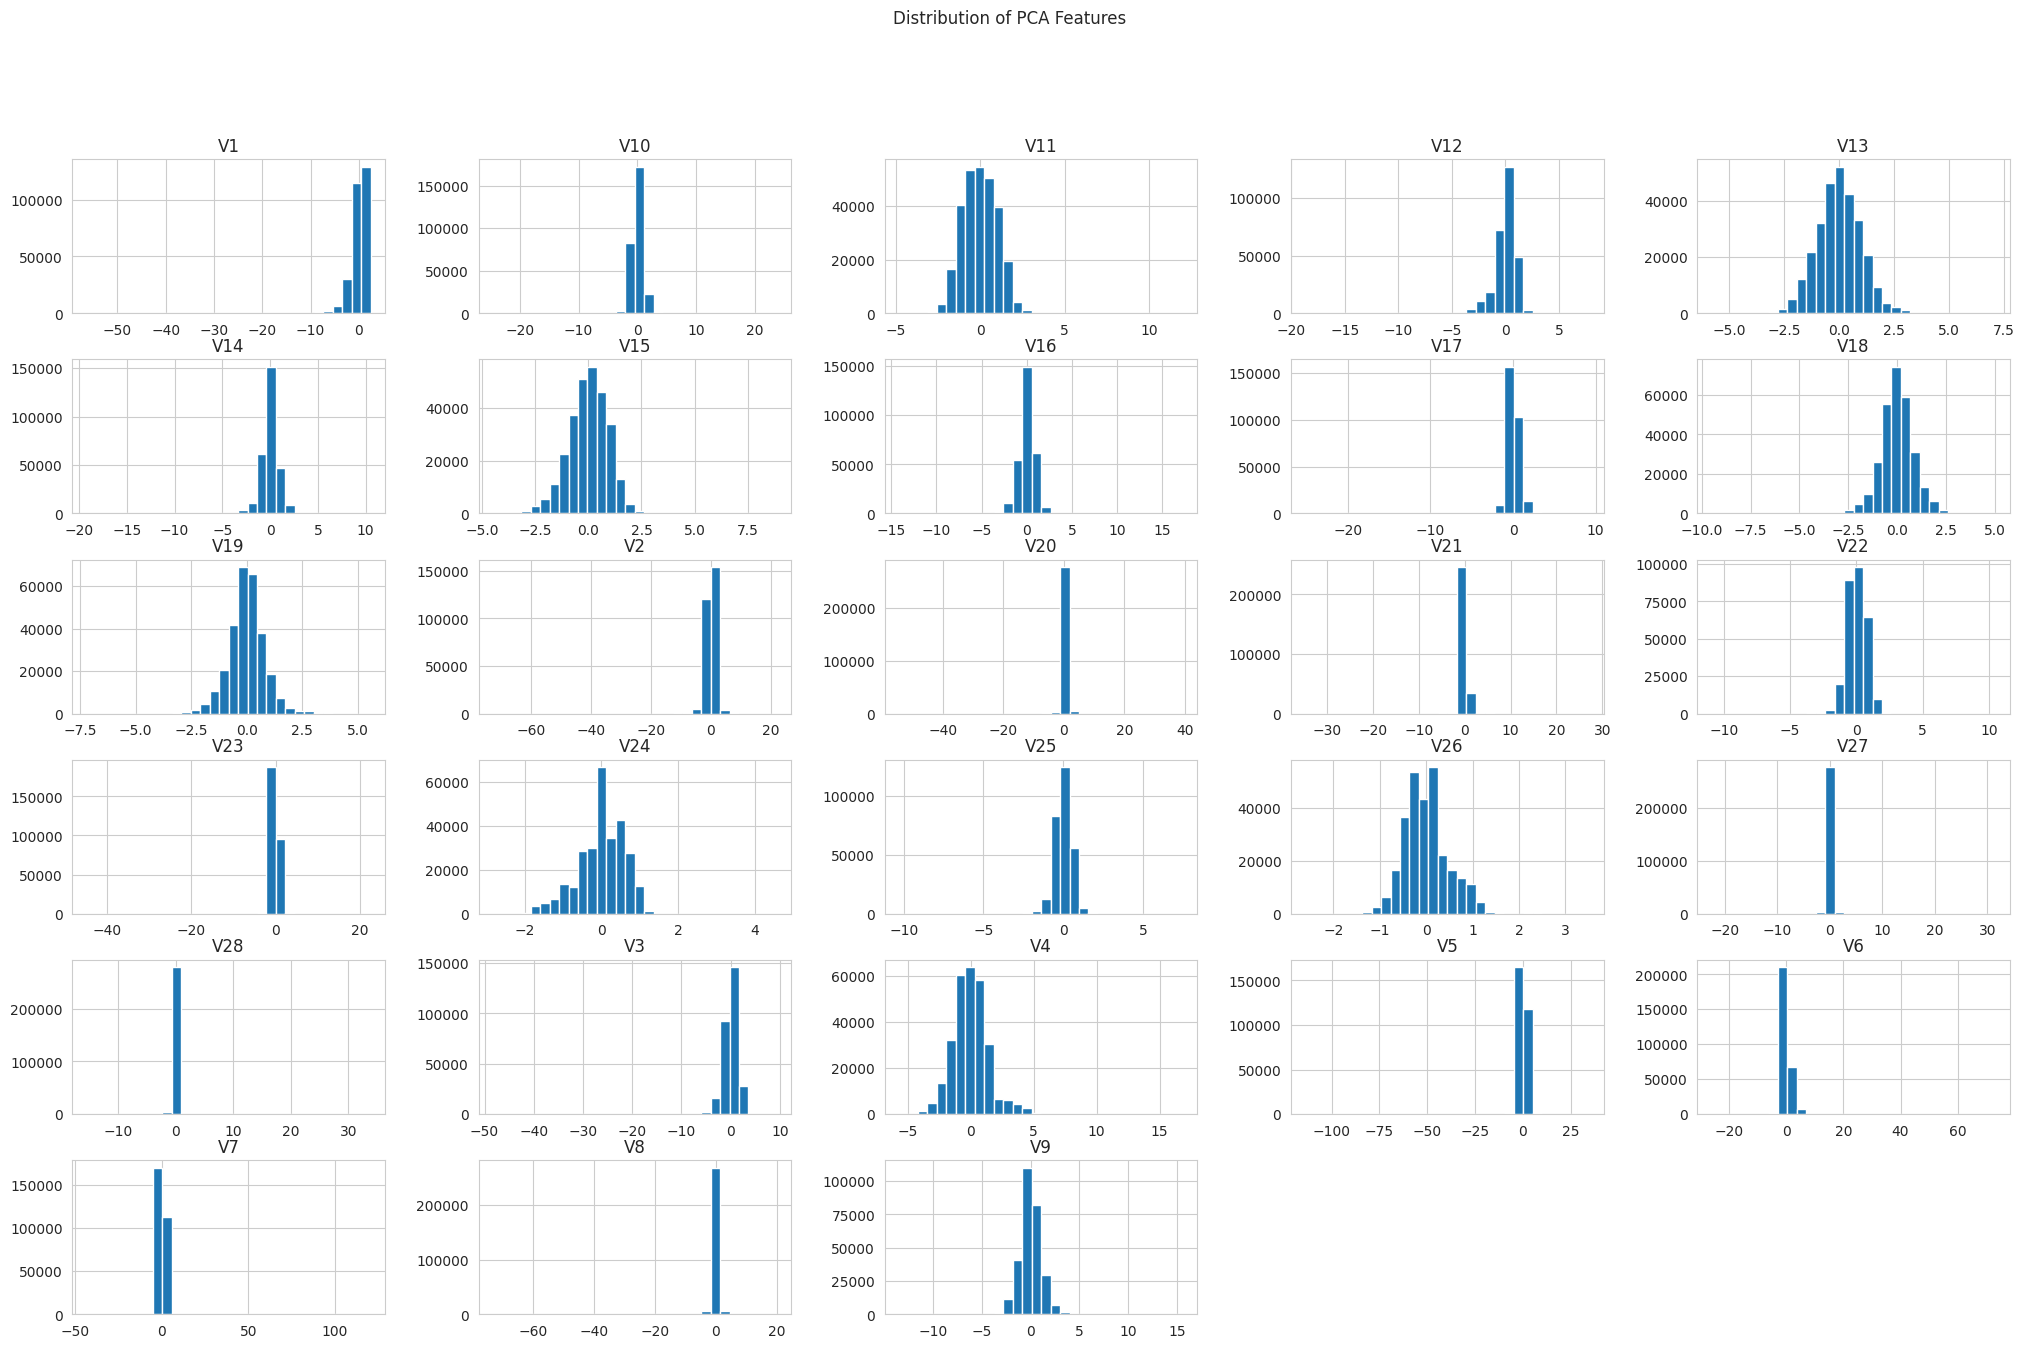

In [22]:
features = df.columns.difference(['Time', 'Amount', 'Class'])
features

df[features].hist(figsize=(25,15), bins=30)
plt.suptitle("Distribution of PCA Features")

plt.savefig("Distribution Feature.jpg", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

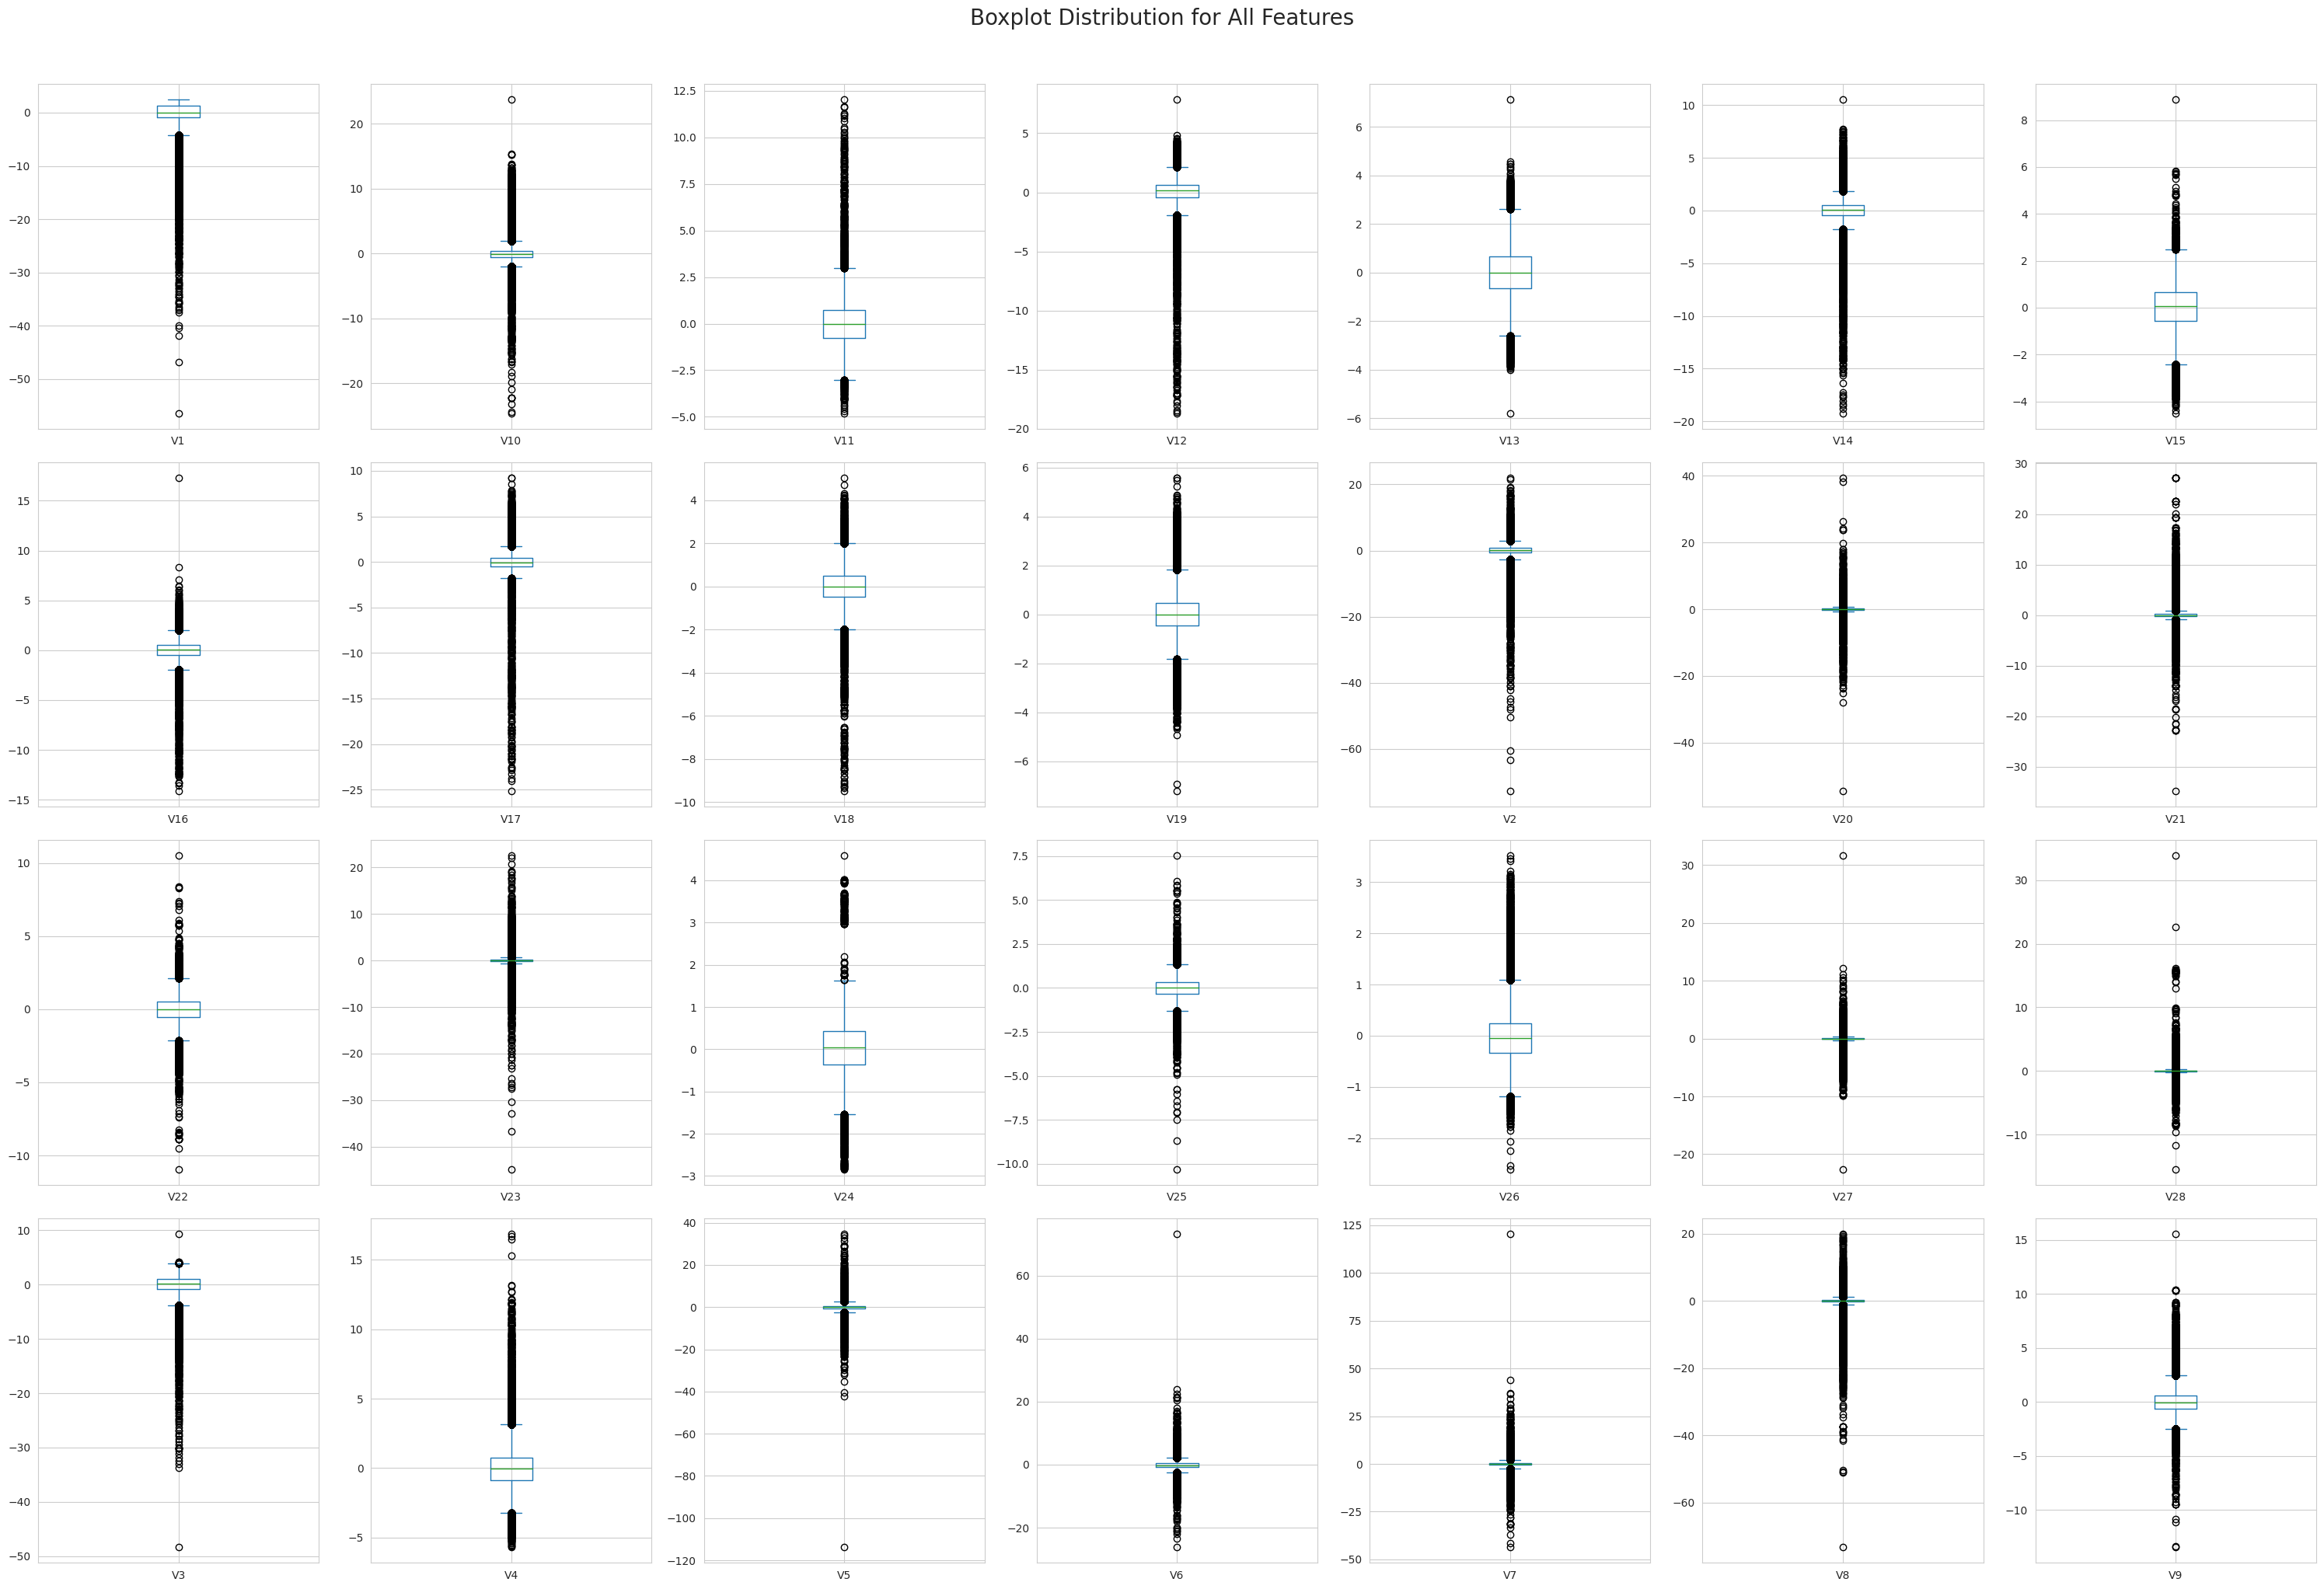

In [ ]:
import math

n_cols = 7
n_features = len(features)
n_rows = math.ceil(n_features / n_cols)

ax_list = df[features].plot(
    kind='box', 
    subplots=True,           
    layout=(n_rows, n_cols), 
    figsize=(30, 5 * n_rows), 
    sharex=False,            
    rot=0                    
)

plt.suptitle("Boxplot Distribution for All Features", fontsize=20, y=1.02)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


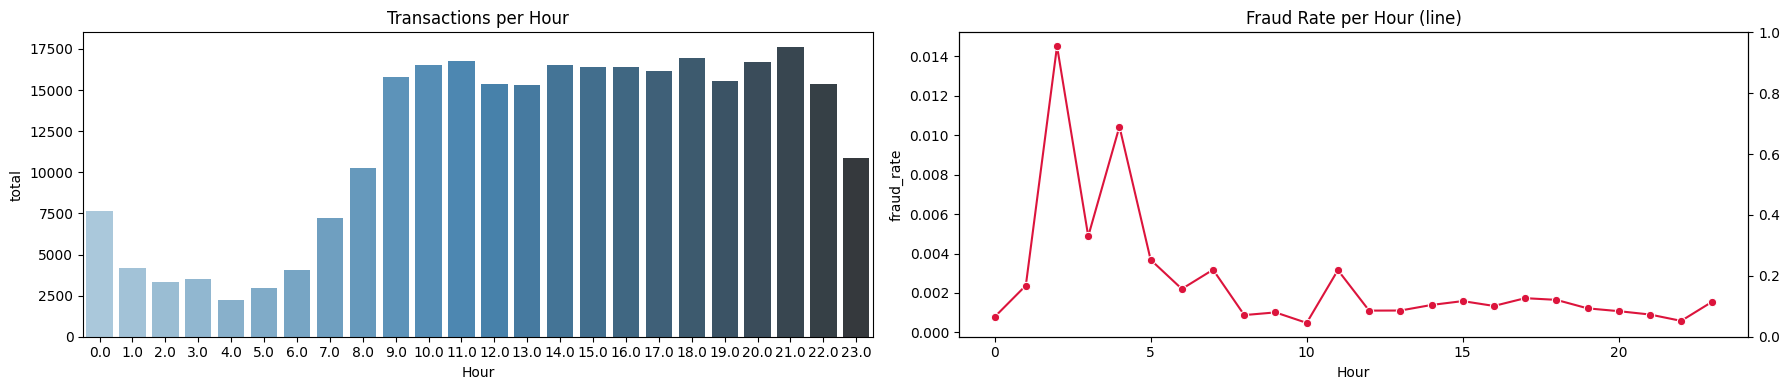

In [ ]:
df['Hour'] = (df['Time'] // 3600) % 24
hourly = df.groupby('Hour').agg(total=('Class','count'), frauds=('Class','sum')).reset_index()
hourly['fraud_rate'] = hourly['frauds'] / hourly['total']

fig, ax = plt.subplots(1,2, figsize=(18,4))
sns.barplot(x='Hour', y='total', data=hourly, ax=ax[0], palette='Blues_d')
ax[0].set_title('Transactions per Hour')

ax2 = ax[1].twinx()
sns.lineplot(x='Hour', y='fraud_rate', data=hourly, marker='o', ax=ax[1], color='crimson')
ax[1].set_title('Fraud Rate per Hour (line)')

plt.tight_layout()
plt.show()

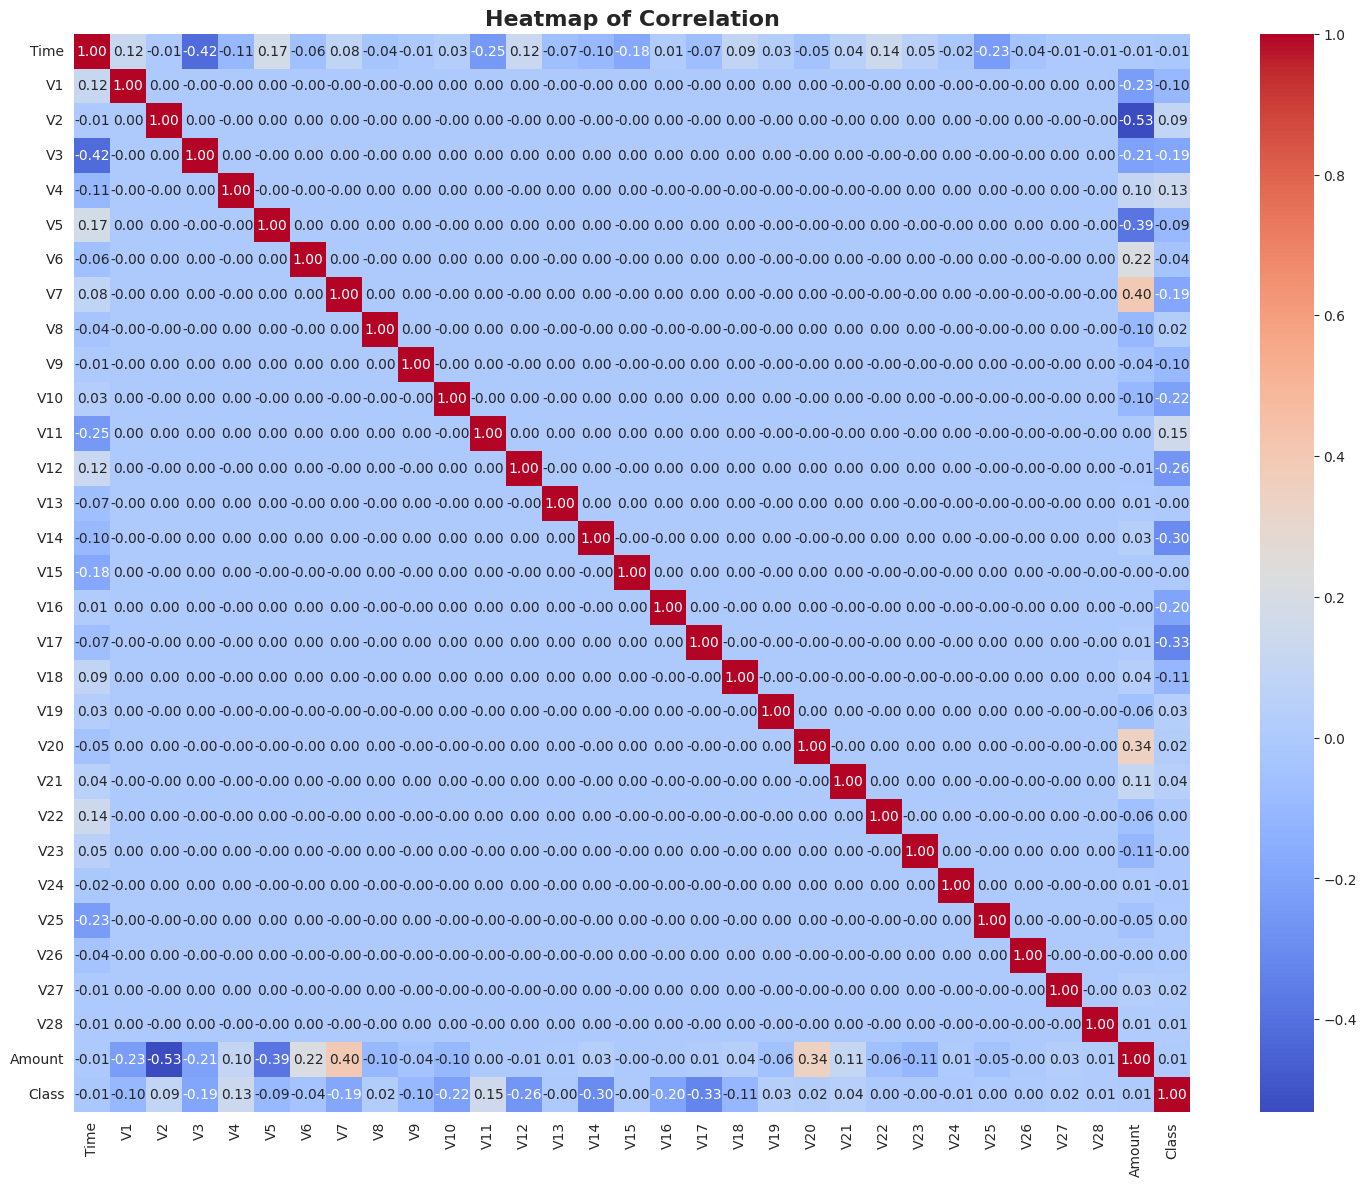

In [25]:
corr = df.corr()

plt.figure(figsize=(18, 14))
plt.title('Heatmap of Correlation', 
          fontsize=16, fontweight='bold')
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f');

plt.savefig("Heatmap of Correlation.jpg", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

# Train model

In [14]:
from sklearn.preprocessing import RobustScaler

X = df.drop("Class", axis=1)
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape)

(226980, 31) (56746, 31) (226980,) (56746,)


## RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

rf_model = RandomForestClassifier(
    n_estimators=1,              
    random_state=42
)

rf_model.fit(X_train, y_train)    

y_pred_rf = rf_model.predict(X_test)
y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1]

print("=== Random Forest")
print(classification_report(y_test, y_pred_rf, digits=2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_prob_rf):.4f}")

=== Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.73      0.68      0.71        95

    accuracy                           1.00     56746
   macro avg       0.86      0.84      0.85     56746
weighted avg       1.00      1.00      1.00     56746

Confusion Matrix:
 [[56627    24]
 [   30    65]]
ROC-AUC: 0.8419


In [ ]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Non-Fraud', 'Fraud'], 
            yticklabels=['Non-Fraud', 'Fraud'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
# ==== Lưu ảnh JPG ====
plt.savefig("confusion_matrix_rf.jpg", dpi=300, bbox_inches='tight')

plt.close()

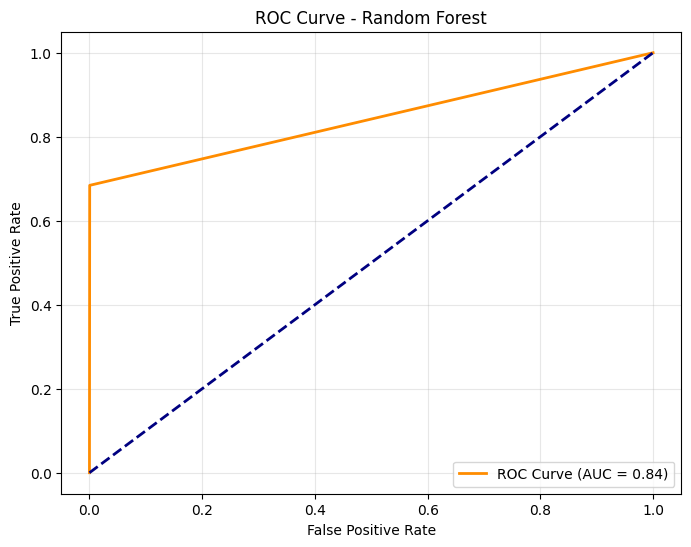

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, 
         label=f'ROC Curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)

plt.savefig("ROC RF.jpg", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

## Ada boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier  
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

ada_model = AdaBoostClassifier(
    n_estimators=1,
    random_state=42
)

ada_model.fit(X_train_scaled, y_train)                
y_pred_ada = ada_model.predict(X_test_scaled)         
y_pred_prob_ada = ada_model.predict_proba(X_test_scaled)[:, 1]  

print("=== AdaBoost ===")                             
print(classification_report(y_test, y_pred_ada, digits=2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ada))
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_prob_ada):.4f}")

=== AdaBoost ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.73      0.63      0.68        95

    accuracy                           1.00     56746
   macro avg       0.87      0.82      0.84     56746
weighted avg       1.00      1.00      1.00     56746

Confusion Matrix:
 [[56629    22]
 [   35    60]]
ROC-AUC: 0.8156



=== Confusion Matrix ===


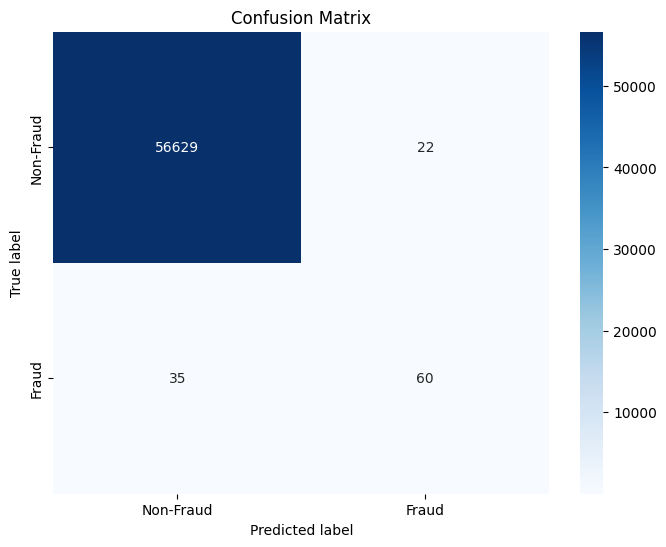

In [27]:
print("\n=== Confusion Matrix ===")
cm_ada = confusion_matrix(y_test, y_pred_ada)
plt.figure(figsize=(8,6))
sns.heatmap(cm_ada, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Non-Fraud', 'Fraud'], 
            yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig("confusion matrix Ada boost.jpg", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

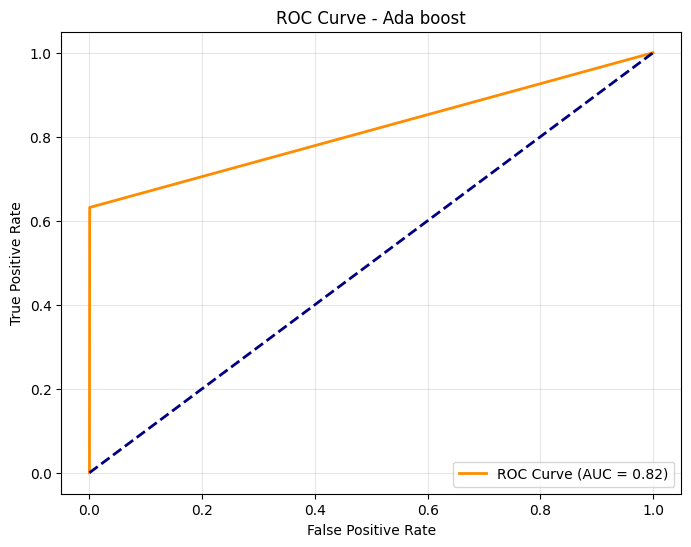

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr_ada, tpr_ada, thresholds_ada = roc_curve(y_test, y_pred_prob_ada)
roc_auc_ada = auc(fpr_ada, tpr_ada)   

plt.figure(figsize=(8, 6))
plt.plot(fpr_ada, tpr_ada, color='darkorange', lw=2, 
         label=f'ROC Curve (AUC = {roc_auc_ada:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Ada boost')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.savefig("ROC Ada boost.jpg", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

## XGB

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(
    n_estimators=1,
    random_state=42,
)

# Huấn luyện
xgb_model.fit(X_train, y_train)

# Dự đoán
y_pred_xgb = xgb_model.predict(X_test)
y_pred_prob_xgb = xgb_model.predict_proba(X_test)[:,1]

# Đánh giá
print("=== XGBoost ===")
print(classification_report(y_test, y_pred_xgb, digits=2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_prob_xgb):.4f}")


=== XGBoost ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.96      0.53      0.68        95

    accuracy                           1.00     56746
   macro avg       0.98      0.76      0.84     56746
weighted avg       1.00      1.00      1.00     56746

Confusion Matrix:
 [[56649     2]
 [   45    50]]
ROC-AUC: 0.8994


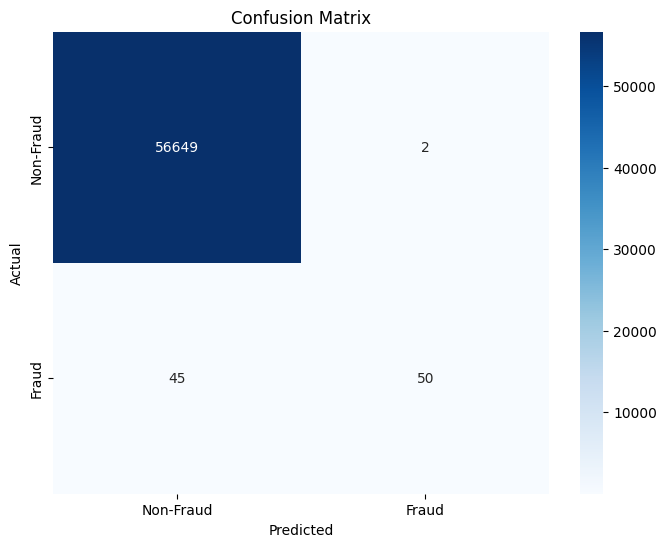

In [ ]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Non-Fraud', 'Fraud'],
            yticklabels=['Non-Fraud', 'Fraud'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("Confusion matrix XGB.jpg", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

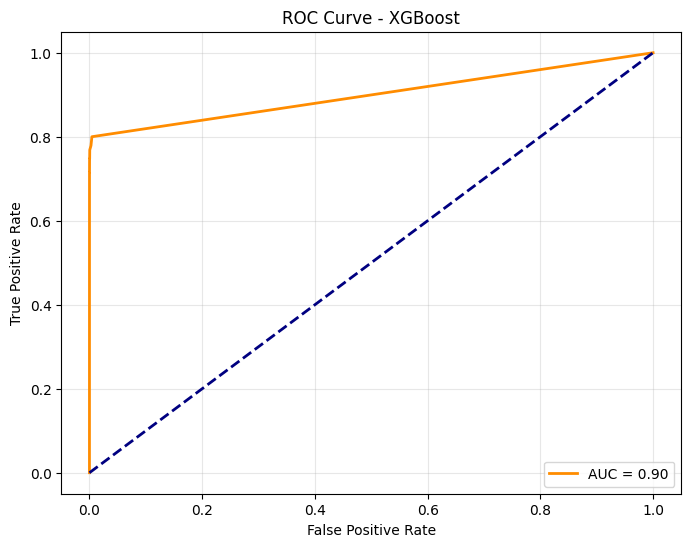

ROC AUC (XGBoost): 0.8994


In [ ]:
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2,
         label=f'AUC = {roc_auc_xgb:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.savefig("ROC XGB.jpg", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print(f"ROC AUC (XGBoost): {roc_auc_xgb:.4f}")

## KNN

In [32]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier

best_k = 5

knn_model = KNeighborsClassifier(
    n_neighbors=best_k
)

knn_model.fit(X_train_scaled, y_train)

y_pred_knn = knn_model.predict(X_test_scaled)
y_pred_prob_knn = knn_model.predict_proba(X_test_scaled)[:, 1]

print(f"=== KNN (k={best_k})")
print(classification_report(y_test, y_pred_knn, digits=2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_prob_knn):.4f}")

=== KNN (k=5)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.97      0.67      0.80        95

    accuracy                           1.00     56746
   macro avg       0.98      0.84      0.90     56746
weighted avg       1.00      1.00      1.00     56746

Confusion Matrix:
 [[56649     2]
 [   31    64]]
ROC-AUC: 0.8893


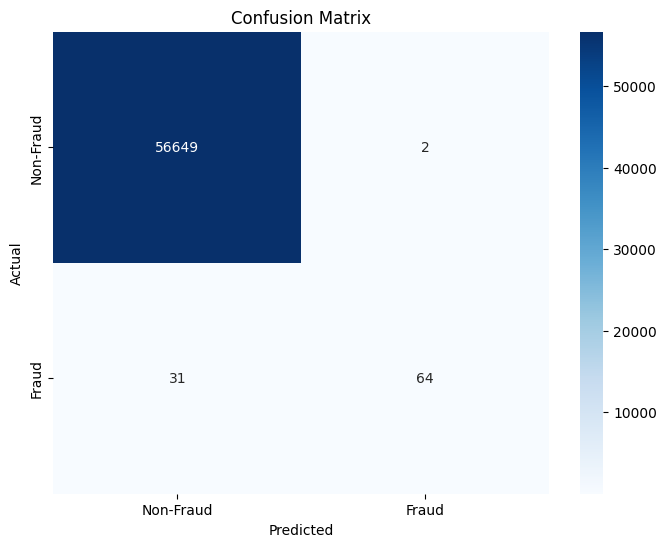

In [33]:
# ===== Confusion Matrix - KNN =====
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Non-Fraud', 'Fraud'],
            yticklabels=['Non-Fraud', 'Fraud'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("Confusion matrix KNN.jpg", dpi=300, bbox_inches='tight')
plt.show()
plt.close()


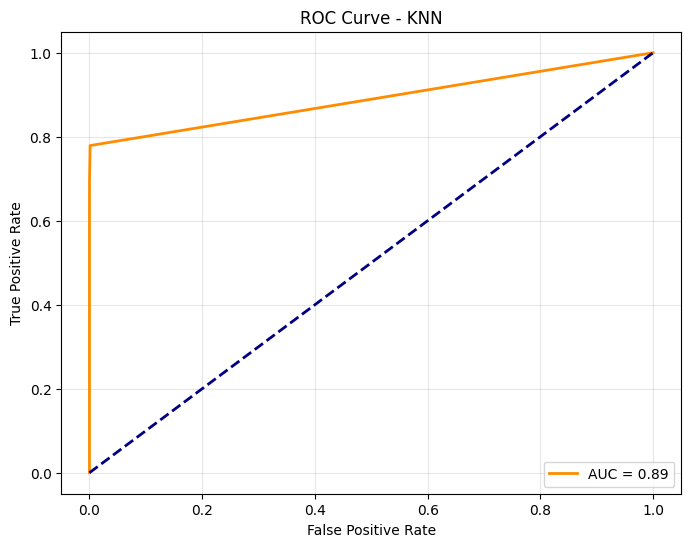

ROC AUC (KNN): 0.8893


In [ ]:
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2,
         label=f'AUC = {roc_auc_knn:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.savefig("ROC KNN.jpg", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print(f"ROC AUC (KNN): {roc_auc_knn:.4f}")

## CNN

In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, Dropout, GlobalAveragePooling1D, Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.metrics import AUC, Precision, Recall
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import numpy as np

X_train_cnn = np.expand_dims(X_train_scaled, axis=-1)
X_test_cnn  = np.expand_dims(X_test_scaled,  axis=-1)   

print("Shape cho CNN:")
print("X_train_cnn:", X_train_cnn.shape)
print("X_test_cnn :", X_test_cnn.shape)

Shape cho CNN:
X_train_cnn: (226980, 31, 1)
X_test_cnn : (56746, 31, 1)


In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, Dropout, GlobalAveragePooling1D, Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.metrics import AUC, Precision, Recall, Accuracy

model = Sequential()

# ----- Block 1 -----
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# ----- Block 2 -----
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# ----- Block 3 -----
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# ----- Global Pooling thay Flatten -----
model.add(GlobalAveragePooling1D())

# ----- Dense Blocks -----
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(32, activation='relu'))

# Output layer
model.add(Dense(1, activation="sigmoid"))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1764142936.117950      47 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 29, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 29, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 29, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 27, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 27, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 27, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 25, 128)        │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 25, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 25, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 102,401 (400.00 KB)

 Trainable params: 101,761 (397.50 KB)

 Non-trainable params: 640 (2.50 KB)

In [37]:
# Compile model
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss="binary_crossentropy",
    metrics=[
        AUC(name="auc"),
        Precision(name="precision"),
        Recall(name="recall")
    ]
)

In [38]:
from tensorflow.keras.callbacks import EarlyStopping

# ===== Early Stopping - SỬA ĐÚNG =====
early_stop = EarlyStopping(
    monitor='val_loss',           # quan trọng: theo dõi AUC, không phải val_loss
    # mode='max',                  # phải bật mode='max' khi monitor AUC
    patience=5,                 # tăng patience lên 10 vì AUC dao động chậm
    restore_best_weights=True,
    verbose=1
)

history = model.fit(
    X_train_cnn, y_train,
    epochs=100,
    batch_size=2048,
    validation_data=(X_test_cnn, y_test),   # cũng phải dùng X_test_cnn
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100


I0000 00:00:1764142960.375116     156 service.cc:148] XLA service 0x79c9a0002db0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1764142960.375585     156 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1764142961.045900     156 cuda_dnn.cc:529] Loaded cuDNN version 90300


 13/111 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - auc: 0.1040 - loss: 0.8058 - precision: 0.0035 - recall: 0.0344       

I0000 00:00:1764142967.179558     156 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


111/111 ━━━━━━━━━━━━━━━━━━━━ 20s 85ms/step - auc: 0.1794 - loss: 0.6440 - precision: 0.0052 - recall: 0.0151 - val_auc: 0.9475 - val_loss: 0.2659 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - auc: 0.4974 - loss: 0.2645 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_auc: 0.7990 - val_loss: 0.2011 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - auc: 0.7925 - loss: 0.2136 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_auc: 0.7829 - val_loss: 0.1844 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - auc: 0.8155 - loss: 0.1883 - precision: 0.5446 - recall: 0.0035 - val_auc: 0.8026 - val_loss: 0.1669 - val_precision: 1.0000 - val_recall: 0.0842
Epoch 5/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - auc: 0.8455 - loss: 0.1677 - precision: 0.1429 - recall: 4.0704e-04 - val_auc: 0.8708 - val_loss: 0.1497 - 

1774/1774 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step

=== 1D-CNN Classification Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.85      0.72      0.78        95

    accuracy                           1.00     56746
   macro avg       0.92      0.86      0.89     56746
weighted avg       1.00      1.00      1.00     56746



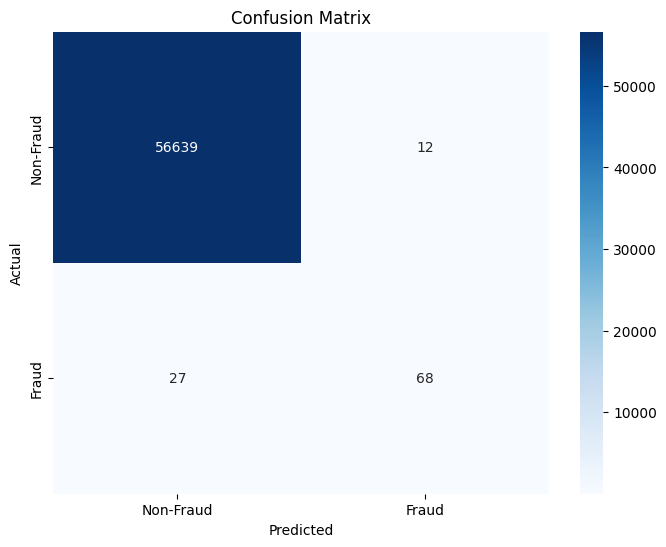

ROC-AUC: 0.9431


In [39]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import numpy as np

y_pred_prob = model.predict(X_test_cnn).ravel()
y_pred = (y_pred_prob > 0.5).astype(int)

print("\n=== 1D-CNN Classification Report ===")
print(classification_report(y_test, y_pred, digits=2))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Non-Fraud', 'Fraud'],
            yticklabels=['Non-Fraud', 'Fraud'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("Confusion matrix CNN.jpg", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_prob):.4f}")

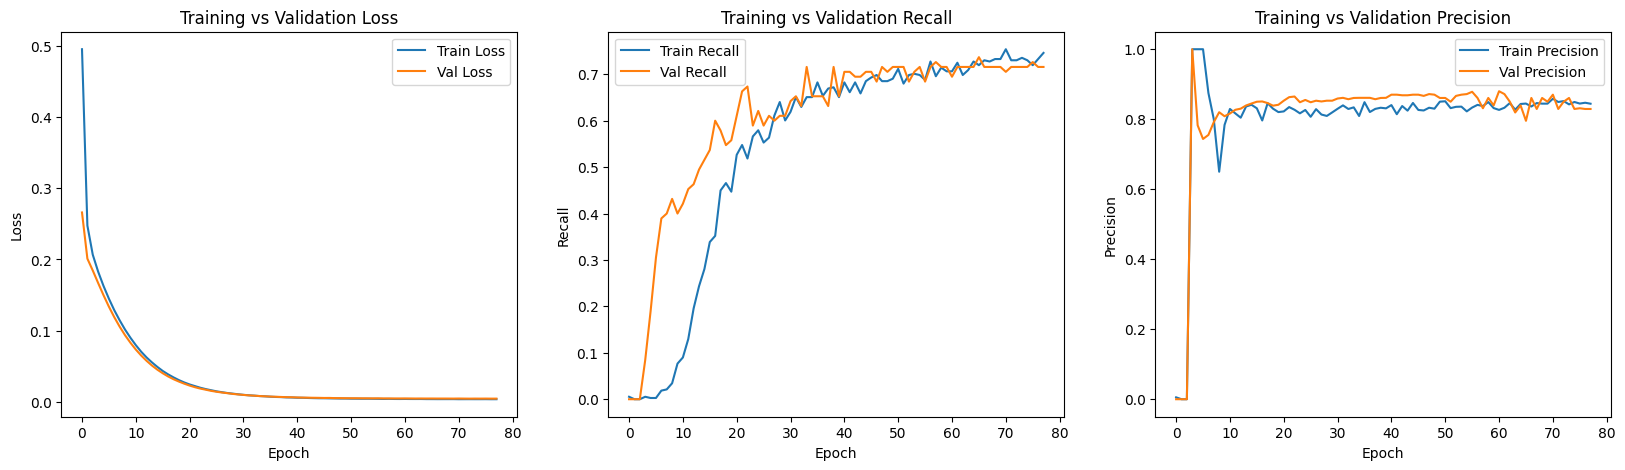

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1,3,2)
plt.plot(history.history['recall'], label="Train Recall")
plt.plot(history.history['val_recall'], label="Val Recall")
plt.title("Training vs Validation Recall")
plt.xlabel("Epoch")
plt.ylabel("Recall")
plt.legend()

plt.subplot(1,3,3)
plt.plot(history.history['precision'], label="Train Precision")
plt.plot(history.history['val_precision'], label="Val Precision")
plt.title("Training vs Validation Precision")
plt.xlabel("Epoch")
plt.ylabel("Precision")
plt.legend()

plt.savefig("Train Val CNN.jpg", dpi=300, bbox_inches='tight')
plt.show()
plt.close()


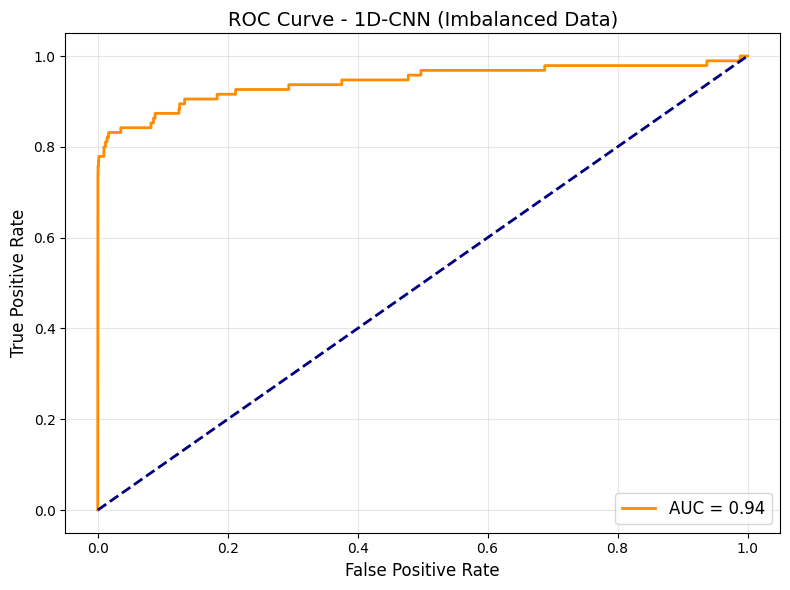

Final ROC AUC (1D-CNN): 0.9431


In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve', fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.savefig("ROC CNN.jpg", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print(f"Final ROC AUC (1D-CNN): {roc_auc:.4f}")

## Bi_LSTM

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.metrics import AUC, Precision, Recall
from tensorflow.keras.regularizers import l2
import numpy as np

X_train_lstm = np.expand_dims(X_train_scaled, axis=-1)
X_test_lstm  = np.expand_dims(X_test_scaled,  axis=-1)

print("Shape cho Bi-LSTM:")
print(X_train_lstm.shape, X_test_lstm.shape)

model_bi_lstm = Sequential([
    # Layer 1: Bi-LSTM (return_sequences=True)
    Bidirectional(LSTM(64, return_sequences=True, kernel_regularizer=l2(1e-5), dropout=0.2, recurrent_dropout=0.2),
                  input_shape=(X_train_scaled.shape[1], 1)),
    BatchNormalization(),

    # Layer 2: Bi-LSTM cuối (return_sequences=False)
    Bidirectional(LSTM(32, return_sequences=False, kernel_regularizer=l2(1e-5), dropout=0.2, recurrent_dropout=0.2)),
    BatchNormalization(),
    Dropout(0.3),

    # Dense layers
    Dense(128, activation='relu', kernel_regularizer=l2(1e-5)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(64, activation='relu', kernel_regularizer=l2(1e-5)),
    Dropout(0.3),

    # Output
    Dense(1, activation='sigmoid')
])

# Compile
model_bi_lstm.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss='binary_crossentropy',
    metrics=[AUC(name='auc'), Precision(name='precision'), Recall(name='recall')]
)

model_bi_lstm.summary()

Shape cho Bi-LSTM:
(226980, 31, 1) (56746, 31, 1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 31, 128)        │        33,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 31, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 92,929 (363.00 KB)

 Trainable params: 92,289 (360.50 KB)

 Non-trainable params: 640 (2.50 KB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop_bi_lstm = EarlyStopping(
    monitor='val_auc',       
    mode='max',              
    patience=15,             
    restore_best_weights=True,
    verbose=1
)

history_bi_lstm = model_bi_lstm.fit(
    X_train_lstm, y_train,
    validation_data=(X_test_lstm, y_test),   
    epochs=100,
    batch_size=2048,               
    callbacks=[early_stop_bi_lstm],
    verbose=1
)

Epoch 1/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 52s 315ms/step - auc: 0.5436 - loss: 0.3012 - precision: 0.0018 - recall: 0.1535 - val_auc: 0.3153 - val_loss: 0.0427 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 33s 299ms/step - auc: 0.7458 - loss: 0.0189 - precision: 0.1060 - recall: 0.0127 - val_auc: 0.4787 - val_loss: 0.0178 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 33s 301ms/step - auc: 0.8353 - loss: 0.0138 - precision: 0.4739 - recall: 0.1167 - val_auc: 0.7309 - val_loss: 0.0146 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 33s 298ms/step - auc: 0.8406 - loss: 0.0125 - precision: 0.6828 - recall: 0.3291 - val_auc: 0.7946 - val_loss: 0.0124 - val_precision: 0.7407 - val_recall: 0.2105
Epoch 5/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 33s 297ms/step - auc: 0.8816 - loss: 0.0108 - precision: 0.6783 - recall: 0.4018 - val_auc: 0.8735 - val_loss: 0.0101 -

1774/1774 ━━━━━━━━━━━━━━━━━━━━ 80s 44ms/step

=== Bi-LSTM Classification Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.86      0.74      0.80        95

    accuracy                           1.00     56746
   macro avg       0.93      0.87      0.90     56746
weighted avg       1.00      1.00      1.00     56746



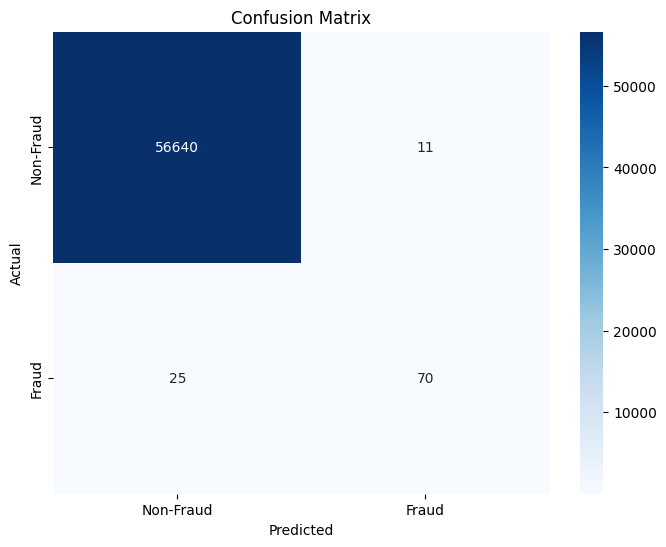

ROC-AUC (Bi-LSTM): 0.9575


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import numpy as np

y_pred_prob_bi_lstm = model_bi_lstm.predict(X_test_lstm).ravel()  
y_pred_bi_lstm = (y_pred_prob_bi_lstm > 0.5).astype(int)

print("\n=== Bi-LSTM Classification Report ===")
print(classification_report(y_test, y_pred_bi_lstm, digits=2))

cm_bi_lstm = confusion_matrix(y_test, y_pred_bi_lstm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_bi_lstm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Non-Fraud', 'Fraud'],
            yticklabels=['Non-Fraud', 'Fraud'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.savefig("Confusion matrix Bi_LSTM.jpg", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print(f"ROC-AUC (Bi-LSTM): {roc_auc_score(y_test, y_pred_prob_bi_lstm):.4f}")

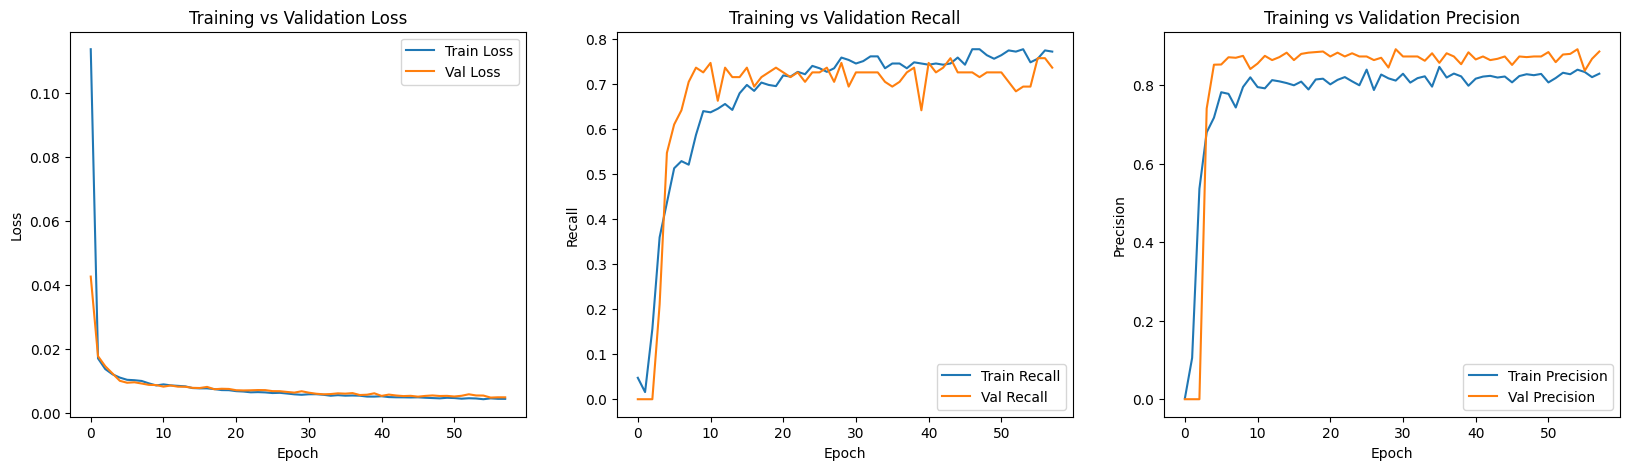

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.plot(history_bi_lstm.history['loss'], label="Train Loss")
plt.plot(history_bi_lstm.history['val_loss'], label="Val Loss")
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1,3,2)
plt.plot(history_bi_lstm.history['recall'], label="Train Recall")
plt.plot(history_bi_lstm.history['val_recall'], label="Val Recall")
plt.title("Training vs Validation Recall")
plt.xlabel("Epoch")
plt.ylabel("Recall")
plt.legend()

plt.subplot(1,3,3)
plt.plot(history_bi_lstm.history['precision'], label="Train Precision")
plt.plot(history_bi_lstm.history['val_precision'], label="Val Precision")
plt.title("Training vs Validation Precision")
plt.xlabel("Epoch")
plt.ylabel("Precision")
plt.legend()

plt.savefig("Train Val Bi_LSTM.jpg", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

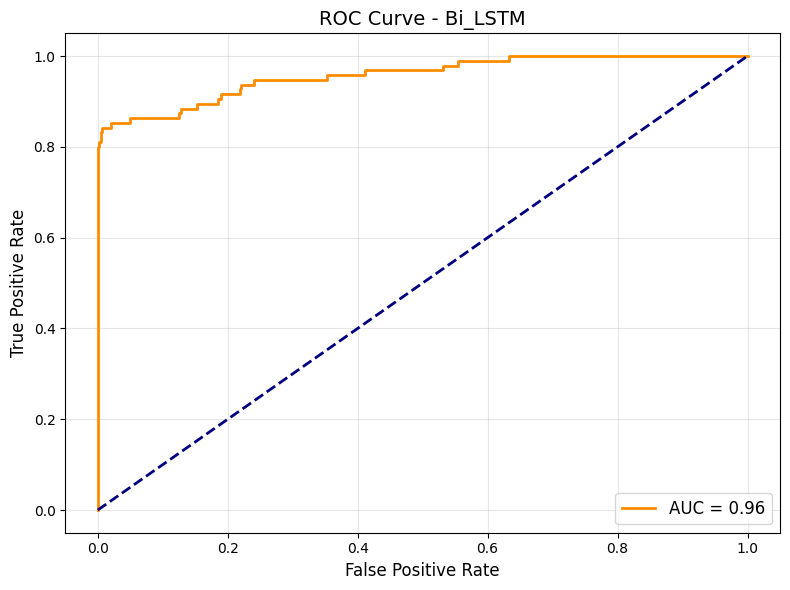

Final ROC AUC (1D-CNN): 0.9575


In [ ]:
from sklearn.metrics import roc_curve, auc

fpr_bi_lstm, tpr_bi_lstm, _ = roc_curve(y_test, y_pred_prob_bi_lstm)
roc_auc_bi_lstm = auc(fpr_bi_lstm, tpr_bi_lstm)

plt.figure(figsize=(8, 6))
plt.plot(fpr_bi_lstm, tpr_bi_lstm, color='darkorange', lw=2,
         label=f'AUC = {roc_auc_bi_lstm:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve', fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.savefig("ROC Bi-LSTM.jpg", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print(f"Final ROC AUC (1D-CNN): {roc_auc_bi_lstm:.4f}")

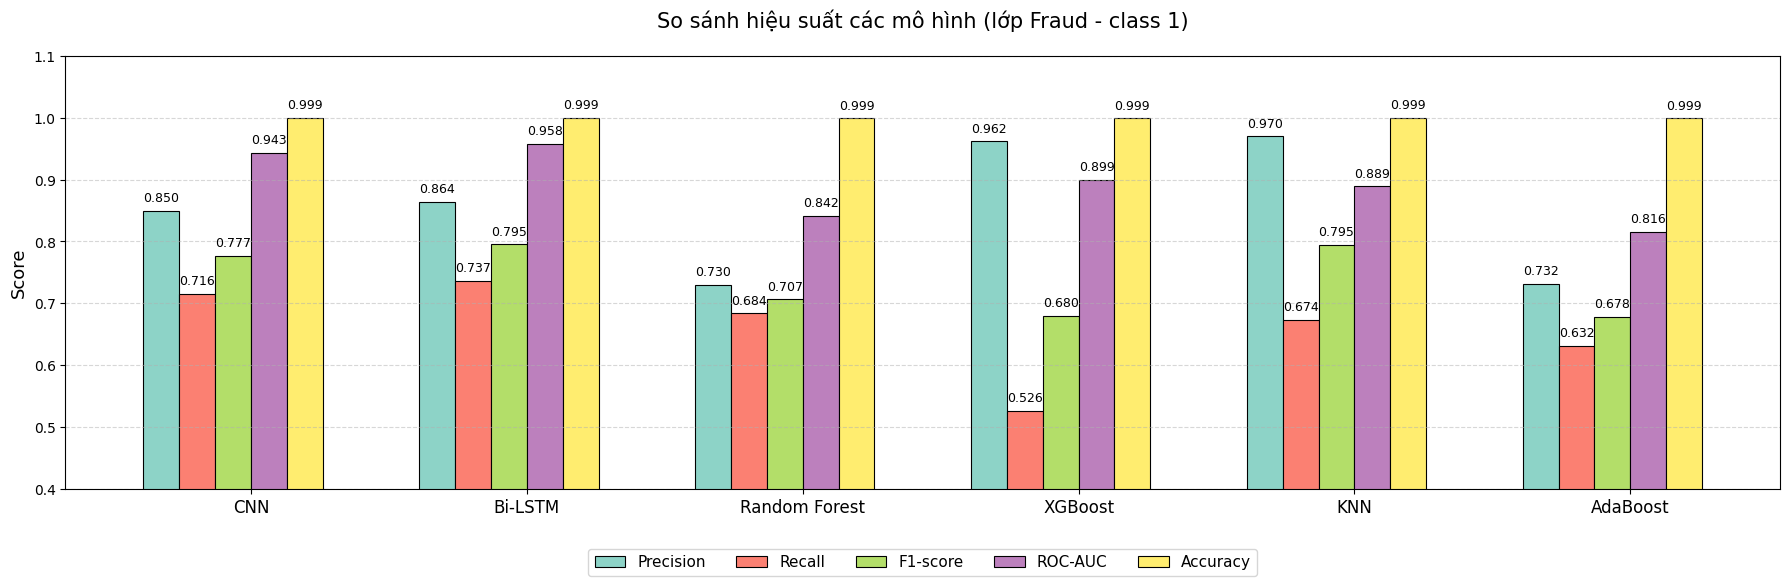

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
from collections import Counter


report_cnn = classification_report(y_test, y_pred, output_dict=True)
cnn_scores = [
    report_cnn['1']['precision'],
    report_cnn['1']['recall'],
    report_cnn['1']['f1-score'],
    roc_auc_score(y_test, y_pred_prob),
    accuracy_score(y_test, y_pred)
]

report_bi_lstm = classification_report(y_test, y_pred_bi_lstm, output_dict=True)
bi_lstm_scores = [
    report_bi_lstm['1']['precision'],
    report_bi_lstm['1']['recall'],
    report_bi_lstm['1']['f1-score'],
    roc_auc_score(y_test, y_pred_prob_bi_lstm),
    accuracy_score(y_test, y_pred_bi_lstm)
]

report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
rf_scores = [
    report_rf['1']['precision'],
    report_rf['1']['recall'],
    report_rf['1']['f1-score'],
    roc_auc_score(y_test, y_pred_prob_rf),
    accuracy_score(y_test, y_pred_rf)
]

report_xgb = classification_report(y_test, y_pred_xgb, output_dict=True)
xgb_scores = [
    report_xgb['1']['precision'],
    report_xgb['1']['recall'],
    report_xgb['1']['f1-score'],
    roc_auc_score(y_test, y_pred_prob_xgb),
    accuracy_score(y_test, y_pred_xgb)
]

report_knn = classification_report(y_test, y_pred_knn, output_dict=True)
knn_scores = [
    report_knn['1']['precision'],
    report_knn['1']['recall'],
    report_knn['1']['f1-score'],
    roc_auc_score(y_test, y_pred_prob_knn),
    accuracy_score(y_test, y_pred_knn)
]

report_ada = classification_report(y_test, y_pred_ada, output_dict=True)
ada_scores = [
    report_ada['1']['precision'],
    report_ada['1']['recall'],
    report_ada['1']['f1-score'],
    roc_auc_score(y_test, y_pred_prob_ada),   
    accuracy_score(y_test, y_pred_ada)
]


metrics = ["Precision", "Recall", "F1-score", "ROC-AUC", "Accuracy"]
scores = np.array([
    cnn_scores,
    bi_lstm_scores,
    rf_scores,
    xgb_scores,
    knn_scores,
    ada_scores
])
models = ["CNN", "Bi-LSTM", "Random Forest", "XGBoost", "KNN", "AdaBoost"]

x = np.arange(len(models))
width = 0.13  

plt.figure(figsize=(18, 6))
colors = plt.cm.Set3(np.linspace(0, 1, len(metrics)))  

for i, (metric, color) in enumerate(zip(metrics, colors)):
    plt.bar(x + i*width, scores[:, i], width, label=metric, color=color, edgecolor='black', linewidth=0.8)

plt.xticks(x + width*2.5, models, fontsize=12)  
plt.ylim(0.4, 1.1)
plt.ylabel("Score", fontsize=13)
plt.title("So sánh hiệu suất các mô hình (lớp Fraud - class 1)", fontsize=15, pad=20)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=5, fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.5)

for i in range(len(models)):
    for j in range(len(metrics)):
        plt.text(x[i] + j*width, scores[i, j] + 0.01, 
                 f"{scores[i,j]:.3f}", 
                 ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

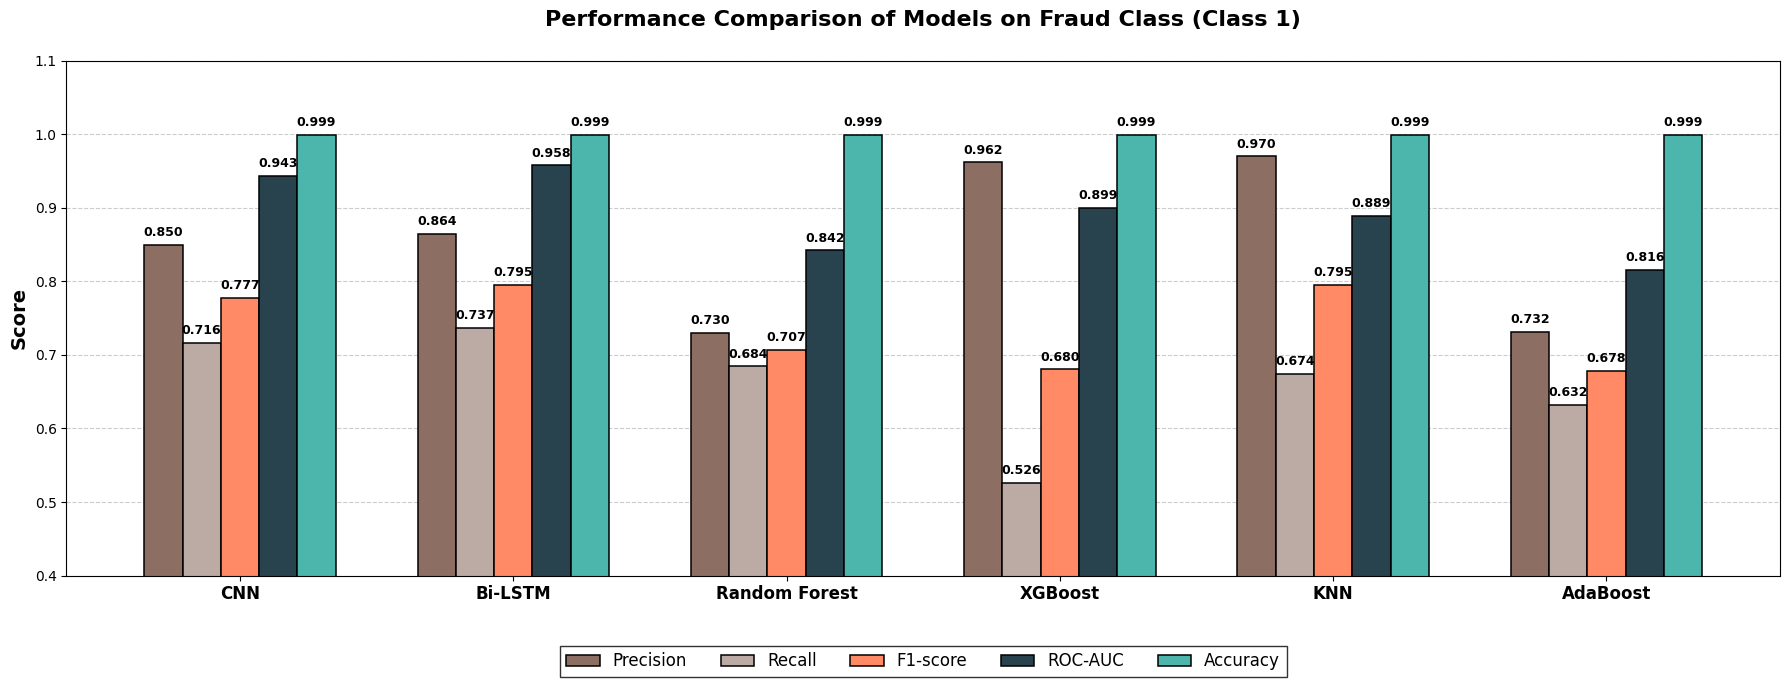

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score

metrics = ["Precision", "Recall", "F1-score", "ROC-AUC", "Accuracy"]
models  = ["CNN", "Bi-LSTM", "Random Forest", "XGBoost", "KNN", "AdaBoost"]

scores = np.array([
    cnn_scores, bi_lstm_scores, rf_scores,
    xgb_scores, knn_scores, ada_scores
])

x = np.arange(len(models))
width = 0.14
plt.figure(figsize=(18, 7))

# custom_colors = [
#     '#4DB6AC',   # Muted Teal
#     '#29434E',   # Muted Navy Blue
#     '#FF8A65',   # Muted Coral Orange
#     '#90A4AE',   # Muted Blue Grey (rất hài hòa với teal & navy)
#     '#A1887F'    # Muted Brown Grey (ấm, trầm, cùng hệ màu với coral)
# ]

custom_colors = [
    '#8D6E63',
    '#BCAAA4',
    '#FF8A65',
    '#29434E',
    '#4DB6AC',
]

for i, (metric, color) in enumerate(zip(metrics, custom_colors)):
    bars = plt.bar(x + i*width, scores[:, i], width, 
                   label=metric, color=color, edgecolor='black', linewidth=1.1)

    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.008,
                 f'{height:.3f}', ha='center', va='bottom', 
                 fontsize=9, fontweight='bold')

plt.xticks(x + width*2, models, fontsize=12, fontweight='bold')
plt.ylim(0.4, 1.1)
plt.ylabel('Score', fontsize=14, fontweight='bold')
plt.title('Performance Comparison of Models on Fraud Class (Class 1)', 
          fontsize=16, fontweight='bold', pad=25)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=5, fontsize=12, frameon=True, fancybox=False, edgecolor='black')

plt.grid(axis='y', linestyle='--', alpha=0.4, color='gray')
plt.gca().set_axisbelow(True)
plt.tight_layout()

plt.savefig("Compare Model(Imbalanced).jpg", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

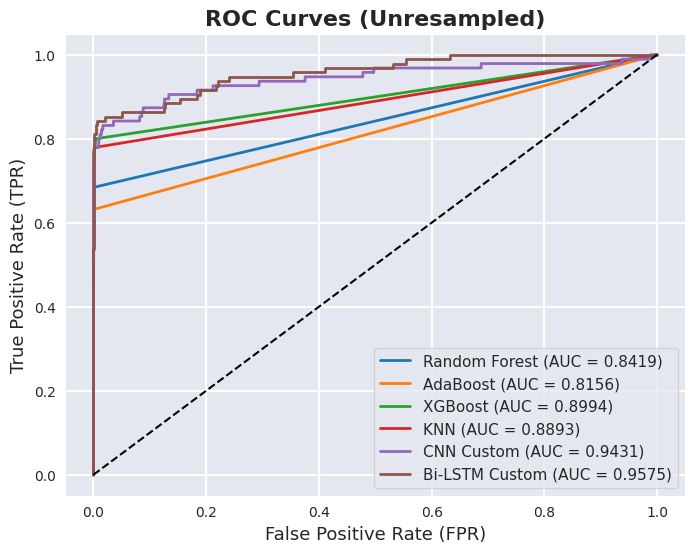

In [ ]:
sns.set_style("darkgrid") 

plt.rcParams['axes.facecolor'] = '#E5E7F0'        # nền vùng plot
plt.rcParams['grid.color'] = 'white'                # grid màu trắng
plt.rcParams['grid.alpha'] = 1.0                    # Tăng alpha 1.0 lưới đậm hơn


plt.figure(figsize=(8, 6))

plt.plot(fpr_rf, tpr_rf, lw=2,
         label=f"Random Forest (AUC = {roc_auc_rf:.4f})")

plt.plot(fpr_ada, tpr_ada, lw=2,
         label=f"AdaBoost (AUC = {roc_auc_ada:.4f})")

plt.plot(fpr_xgb, tpr_xgb, lw=2,
         label=f"XGBoost (AUC = {roc_auc_xgb:.4f})")

plt.plot(fpr_knn, tpr_knn, lw=2,
         label=f"KNN (AUC = {roc_auc_knn:.4f})")

plt.plot(fpr, tpr, lw=2,
         label=f"CNN Custom (AUC = {roc_auc:.4f})")

plt.plot(fpr_bi_lstm, tpr_bi_lstm, lw=2,
         label=f"Bi-LSTM Custom (AUC = {roc_auc_bi_lstm:.4f})")

plt.plot([0, 1], [0, 1], color='black', lw=1.5, linestyle='--')

plt.xlabel('False Positive Rate (FPR)', fontsize=13)
plt.ylabel('True Positive Rate (TPR)', fontsize=13)
plt.title('ROC Curves (Unresampled)', fontsize=16, fontweight='bold')
plt.legend(loc="lower right", fontsize=11)
plt.grid(True, alpha=1.0, linewidth=1.5) 


plt.savefig("ROC_6_models.jpg", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

# Balanced 

## RF

In [50]:
!pip install scikit-learn==1.2.2 imbalanced-learn==0.9.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.3/199.3 kB 4.8 MB/s eta 0:00:0000:01
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.13.0
    Uninstalling imbalanced-learn-0.13.0:
      Successfully uninstalled imbalanced-learn-0.13.0


In [ ]:
from sklearn.preprocessing import RobustScaler
from imblearn.combine import SMOTEENN
from collections import Counter
from sklearn.model_selection import train_test_split
import numpy as np

X = df.drop("Class", axis=1)
y = df["Class"]
print("Original class distribution:", Counter(y))

scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)  


smote_enn = SMOTEENN(sampling_strategy=0.0021, random_state=42)
X_res, y_res = smote_enn.fit_resample(X_scaled, y)
print("After SMOTE-ENN:", Counter(y_res))

X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res,
    test_size=0.2,
    stratify=y_res,
    random_state=42
)

X_train_cnn_res = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn_res  = X_test.reshape((X_test.shape[0],  X_test.shape[1],  1))

print("Final shapes:")
print(f"X_train: {X_train.shape}, y_train: {Counter(y_train)}")
print(f"X_test:  {X_test.shape},  y_test:  {Counter(y_test)}")
print(f"X_train_cnn_res: {X_train_cnn_res.shape}")
print(f"X_test_cnn_res:  {X_test_cnn_res.shape}")

Original class distribution: Counter({0: 283253, 1: 473})
After SMOTE-ENN: Counter({0: 283031, 1: 430})
Final shapes:
X_train: (226768, 31), y_train: Counter({0: 226424, 1: 344})
X_test:  (56693, 31),  y_test:  Counter({0: 56607, 1: 86})
X_train_cnn_res: (226768, 31, 1)
X_test_cnn_res:  (56693, 31, 1)


=== RANDOM FOREST (After SMOTE-ENN) ===
              precision    recall  f1-score   support

           0     0.9999    0.9999    0.9999     56607
           1     0.9302    0.9302    0.9302        86

    accuracy                         0.9998     56693
   macro avg     0.9651    0.9651    0.9651     56693
weighted avg     0.9998    0.9998    0.9998     56693

Confusion Matrix:
 [[56601     6]
 [    6    80]]
ROC-AUC: 0.9651


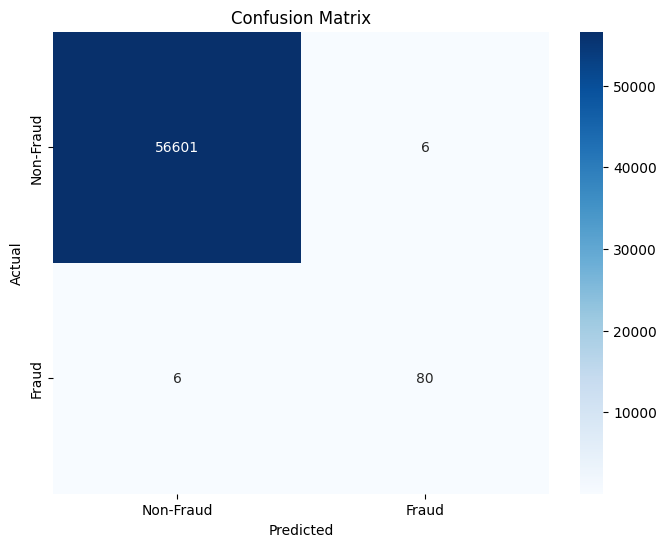

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

rf_res = RandomForestClassifier(
    n_estimators=1,
    random_state=42,
    n_jobs=-1
)

rf_res.fit(X_train, y_train)    

y_pred_rf_res = rf_res.predict(X_test)
y_pred_prob_rf_res = rf_res.predict_proba(X_test)[:, 1]

print("=== RANDOM FOREST (After SMOTE-ENN) ===")
print(classification_report(y_test, y_pred_rf_res, digits=4))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_res))
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_prob_rf_res):.4f}")

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf_res), annot=True, fmt="d", cmap="Blues",
            xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.savefig("Confusion matrix RF Res.jpg", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

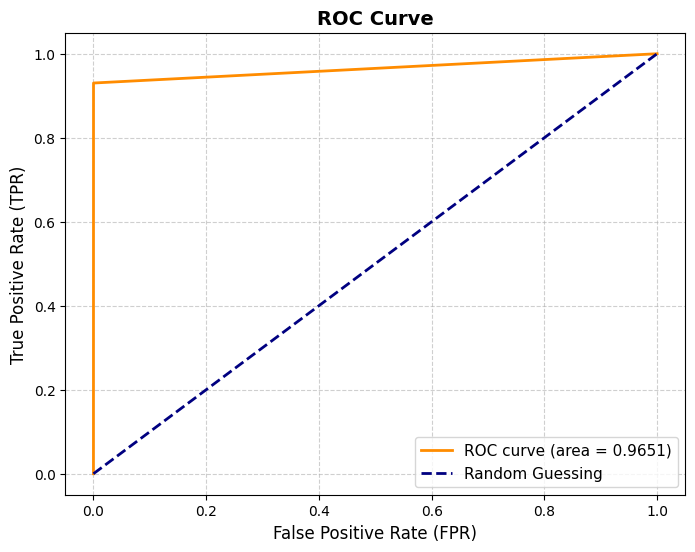

Final ROC AUC (1D-CNN): 0.9651


In [ ]:
fpr_rf_res, tpr_rf_res, thresholds_rf_res = roc_curve(y_test, y_pred_prob_rf_res)
roc_auc_rf_res = auc(fpr_rf_res, tpr_rf_res)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf_res, tpr_rf_res, color='darkorange', lw=2, 
         label=f'ROC curve (area = {roc_auc_rf_res:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('ROC Curve', fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=11)
plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig("ROC RF res.jpg", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print(f"Final ROC AUC (1D-CNN): {roc_auc_rf_res:.4f}")

## Ada boost

=== AdaBoost ===
              precision    recall  f1-score   support

           0     0.9998    0.9998    0.9998     56607
           1     0.8690    0.8488    0.8588        86

    accuracy                         0.9996     56693
   macro avg     0.9344    0.9243    0.9293     56693
weighted avg     0.9996    0.9996    0.9996     56693

Confusion Matrix:
 [[56596    11]
 [   13    73]]
ROC-AUC: 0.9243


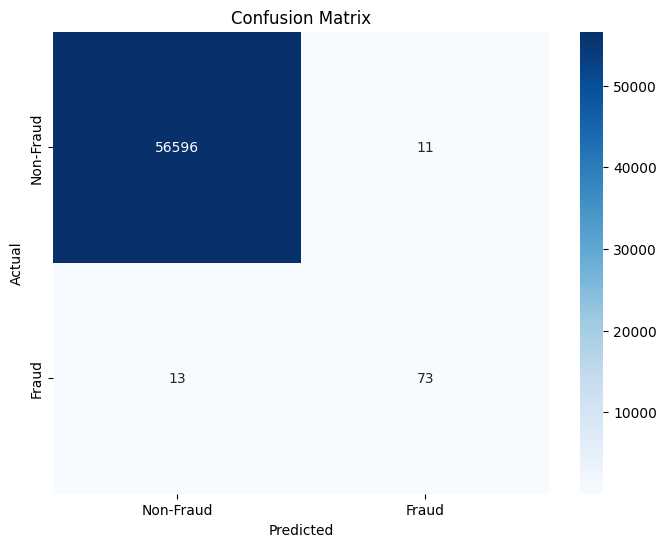

In [ ]:
from sklearn.ensemble import AdaBoostClassifier   
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

ada_res = AdaBoostClassifier(
    n_estimators=1,
    random_state=42
)

ada_res.fit(X_train, y_train)                
y_pred_ada_res = ada_res.predict(X_test)       
y_pred_prob_ada_res = ada_res.predict_proba(X_test)[:, 1]   

print("=== AdaBoost ===")                              
print(classification_report(y_test, y_pred_ada_res, digits=4))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ada_res))
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_prob_ada_res):.4f}")

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_ada_res), annot=True, fmt="d", cmap="Blues",
            xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.savefig("Confusion matrix Ada boost Res.jpg", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

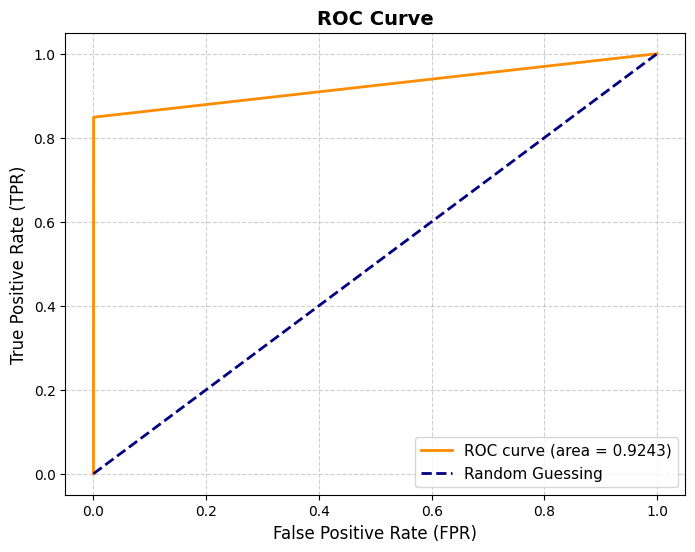

Final ROC AUC (1D-CNN): 0.9243


In [ ]:
fpr_ada_res, tpr_ada_res, thresholds_ada_res = roc_curve(y_test, y_pred_prob_ada_res) # Thêm hậu tố _res
roc_auc_ada_res = auc(fpr_ada_res, tpr_ada_res)

plt.figure(figsize=(8, 6))
plt.plot(fpr_ada_res, tpr_ada_res, color='darkorange', lw=2, 
         label=f'ROC curve (area = {roc_auc_ada_res:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('ROC Curve', fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=11)
plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig("ROC Ada boost res.jpg", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print(f"Final ROC AUC: {roc_auc_ada_res:.4f}")

## XGB

=== XGBOOST (After SMOTE-ENN) ===
              precision    recall  f1-score   support

           0     0.9998    0.9999    0.9998     56607
           1     0.9600    0.8372    0.8944        86

    accuracy                         0.9997     56693
   macro avg     0.9799    0.9186    0.9471     56693
weighted avg     0.9997    0.9997    0.9997     56693

Confusion Matrix:
 [[56604     3]
 [   14    72]]
ROC-AUC: 0.9941


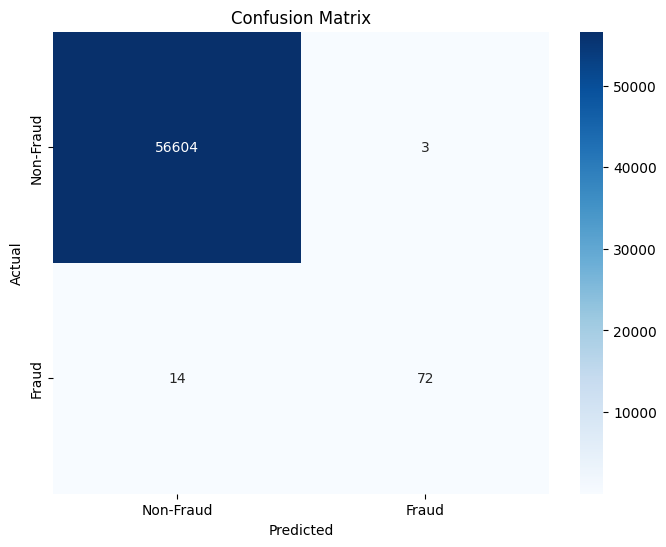

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier 
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

xgb_res = XGBClassifier(
    n_estimators=1,
    random_state=42
)

xgb_res.fit(X_train, y_train)

y_pred_xgb_res = xgb_res.predict(X_test)
y_pred_prob_xgb_res = xgb_res.predict_proba(X_test)[:, 1]

print("=== XGBOOST (After SMOTE-ENN) ===")
print(classification_report(y_test, y_pred_xgb_res, digits=4))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb_res))
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_prob_xgb_res):.4f}")

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb_res), annot=True, fmt="d", cmap="Blues",
            xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.savefig("Confusion matrix XGB Res.jpg", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

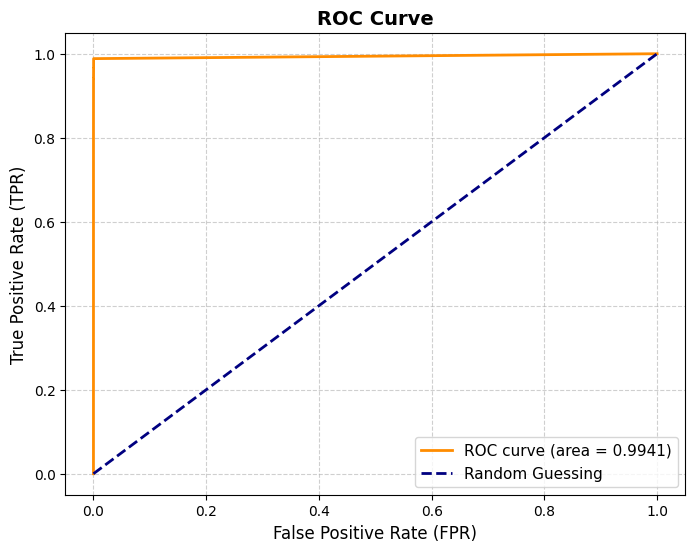

Final ROC AUC (1D-CNN): 0.9941


In [ ]:
fpr_xgb_res, tpr_xgb_res, thresholds_xgb_res = roc_curve(y_test, y_pred_prob_xgb_res)
roc_auc_xgb_res = auc(fpr_xgb_res, tpr_xgb_res)

plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb_res, tpr_xgb_res, color='darkorange', lw=2, 
         label=f'ROC curve (area = {roc_auc_xgb_res:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('ROC Curve', fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=11)
plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig("ROC XGB res.jpg", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print(f"Final ROC AUC: {roc_auc_xgb_res:.4f}")

## KNN

=== K-NEAREST NEIGHBORS (After SMOTE-ENN) ===
              precision    recall  f1-score   support

           0     0.9998    0.9999    0.9999     56607
           1     0.9500    0.8837    0.9157        86

    accuracy                         0.9998     56693
   macro avg     0.9749    0.9418    0.9578     56693
weighted avg     0.9997    0.9998    0.9997     56693

Confusion Matrix:
 [[56603     4]
 [   10    76]]
ROC-AUC: 0.9942


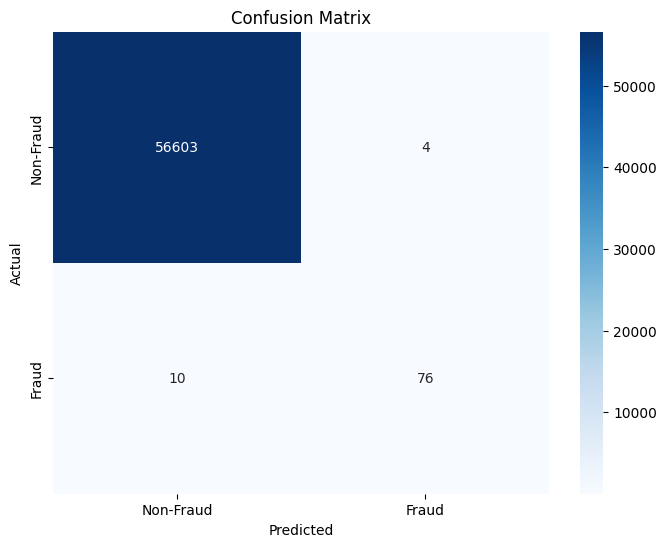

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

knn_res = KNeighborsClassifier(
    n_neighbors=16,
)

knn_res.fit(X_train, y_train)

y_pred_knn_res = knn_res.predict(X_test)
y_pred_prob_knn_res = knn_res.predict_proba(X_test)[:, 1]

print("=== K-NEAREST NEIGHBORS (After SMOTE-ENN) ===")
print(classification_report(y_test, y_pred_knn_res, digits=4))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn_res))
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_prob_knn_res):.4f}")

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_knn_res), annot=True, fmt="d", cmap="Blues",)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.savefig("Confusion matrix KNN Res.jpg", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

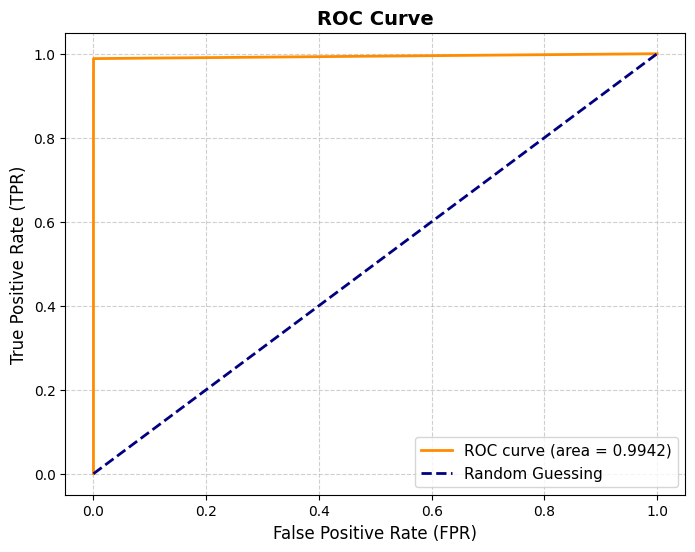

Final ROC AUC: 0.9942


In [ ]:
fpr_knn_res, tpr_knn_res, thresholds_knn_res = roc_curve(y_test, y_pred_prob_knn_res) 
roc_auc_knn_res = auc(fpr_knn_res, tpr_knn_res)

plt.figure(figsize=(8, 6))
plt.plot(fpr_knn_res, tpr_knn_res, color='darkorange', lw=2, 
         label=f'ROC curve (area = {roc_auc_knn_res:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('ROC Curve', fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=11)
plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig("ROC KNN res.jpg", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print(f"Final ROC AUC: {roc_auc_knn_res:.4f}")

## CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, Dropout, GlobalAveragePooling1D, Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC, Precision, Recall
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

model_cnn_res = Sequential()

# Block 1
model_cnn_res.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same',
                         input_shape=(X_train_cnn_res.shape[1], 1)))
model_cnn_res.add(BatchNormalization())
model_cnn_res.add(Dropout(0.2))

# Block 2
model_cnn_res.add(Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'))
model_cnn_res.add(BatchNormalization())
model_cnn_res.add(Dropout(0.3))

# Block 3
model_cnn_res.add(Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'))
model_cnn_res.add(BatchNormalization())
model_cnn_res.add(Dropout(0.3))

# Global Pooling
model_cnn_res.add(GlobalAveragePooling1D())

# Dense layers
model_cnn_res.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model_cnn_res.add(Dropout(0.5))
model_cnn_res.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model_cnn_res.add(Dense(32, activation='relu'))

# Output
model_cnn_res.add(Dense(1, activation='sigmoid'))

model_cnn_res.compile(
    optimizer=Adam(learning_rate=0.0001),   # hơi cao hơn 1 chút vì dữ liệu đã sạch
    loss='binary_crossentropy',
    metrics=[AUC(name='auc'), Precision(name='precision'), Recall(name='recall')]
)

# Summary
model_cnn_res.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_3 (Conv1D)               │ (None, 31, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 31, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 31, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 31, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 31, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 31, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 31, 128)        │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 31, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 31, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_1      │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 102,401 (400.00 KB)

 Trainable params: 101,761 (397.50 KB)

 Non-trainable params: 640 (2.50 KB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping_cnn_res = EarlyStopping(
    monitor='val_auc',           
    mode='max',                  
    patience=5,                 
    restore_best_weights=True,
    verbose=1
)

history_cnn_res = model_cnn_res.fit(                    
    X_train_cnn_res, y_train,                           
    validation_data=(X_test_cnn_res, y_test),           
    epochs=100,
    batch_size=2048,
    callbacks=[early_stopping_cnn_res],
    verbose=1
)

Epoch 1/100


2025-11-26 08:47:16.685655: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng4{k11=2} for conv (f32[2048,128,1,31]{3,2,1,0}, u8[0]{0}) custom-call(f32[2048,128,1,31]{3,2,1,0}, f32[128,128,1,3]{3,2,1,0}), window={size=1x3 pad=0_0x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardInput", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]} is taking a while...
2025-11-26 08:47:17.576434: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.890987572s
Trying algorithm eng4{k11=2} for conv (f32[2048,128,1,31]{3,2,1,0}, u8[0]{0}) custom-call(f32[2048,128,1,31]{3,2,1,0}, f32[128,128,1,3]{3,2,1,0}), window={size=1x3 pad=0_0x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardInput", backend_config={"cudnn_conv_backend_c

111/111 ━━━━━━━━━━━━━━━━━━━━ 21s 93ms/step - auc: 0.1665 - loss: 0.7029 - precision: 5.0965e-04 - recall: 0.0113 - val_auc: 0.8999 - val_loss: 0.2743 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - auc: 0.2259 - loss: 0.2719 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_auc: 0.9260 - val_loss: 0.2001 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - auc: 0.7316 - loss: 0.2146 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_auc: 0.8665 - val_loss: 0.1840 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - auc: 0.8450 - loss: 0.1895 - precision: 0.4814 - recall: 0.0086 - val_auc: 0.8763 - val_loss: 0.1676 - val_precision: 1.0000 - val_recall: 0.1163
Epoch 5/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - auc: 0.9027 - loss: 0.1697 - precision: 0.6527 - recall: 0.0060 - val_auc: 0.9099 - val_loss: 0.1514 - 

1772/1772 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step

Classification Report:
              precision    recall  f1-score   support

           0     0.9999    0.9999    0.9999     56607
           1     0.9205    0.9419    0.9310        86

    accuracy                         0.9998     56693
   macro avg     0.9602    0.9709    0.9655     56693
weighted avg     0.9998    0.9998    0.9998     56693



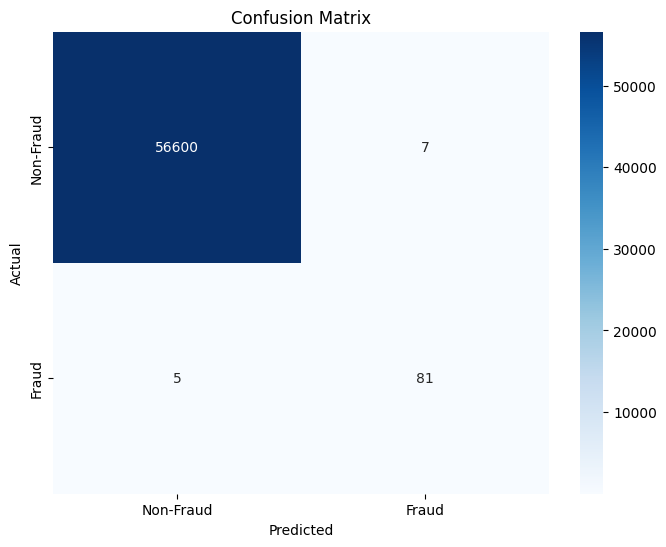

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred_prob_cnn_res = model_cnn_res.predict(X_test)
y_pred_cnn_res = (y_pred_prob_cnn_res > 0.5).astype(int)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_cnn_res, digits=4))

cm_cnn_res = confusion_matrix(y_test, y_pred_cnn_res)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_cnn_res, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.savefig("Confusion matrix CNN Res.jpg", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

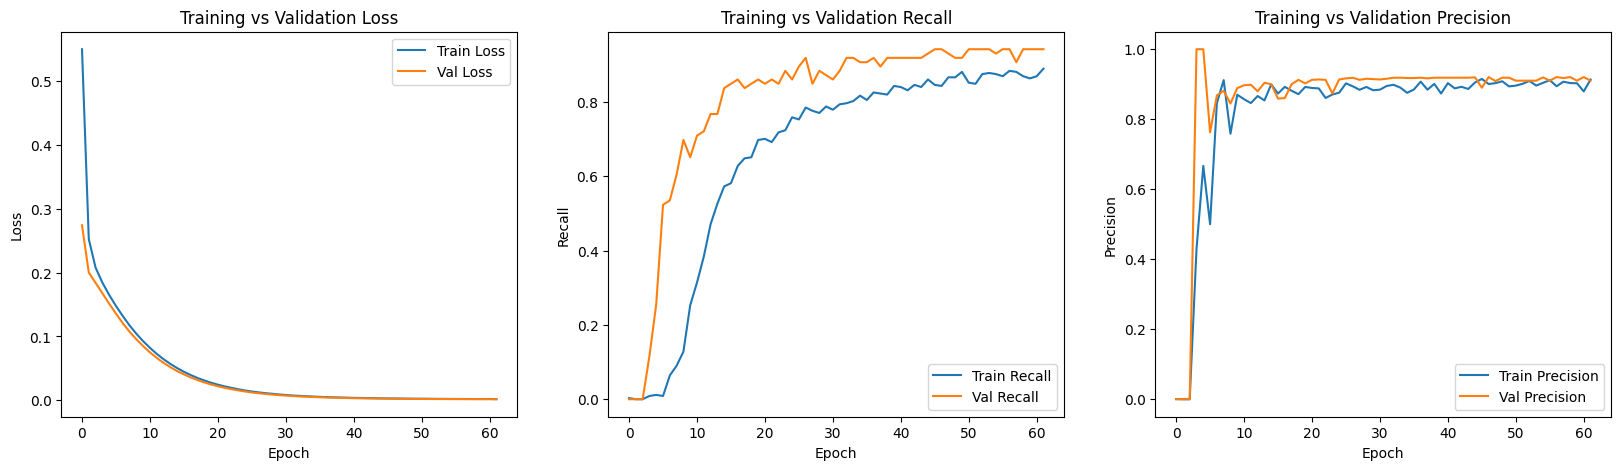

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.plot(history_cnn_res.history['loss'], label="Train Loss")
plt.plot(history_cnn_res.history['val_loss'], label="Val Loss")
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1,3,2)
plt.plot(history_cnn_res.history['recall'], label="Train Recall")
plt.plot(history_cnn_res.history['val_recall'], label="Val Recall")
plt.title("Training vs Validation Recall")
plt.xlabel("Epoch")
plt.ylabel("Recall")
plt.legend()

plt.subplot(1,3,3)
plt.plot(history_cnn_res.history['precision'], label="Train Precision")
plt.plot(history_cnn_res.history['val_precision'], label="Val Precision")
plt.title("Training vs Validation Precision")
plt.xlabel("Epoch")
plt.ylabel("Precision")
plt.legend()

plt.savefig("Train Val CNN res.jpg", dpi=300, bbox_inches='tight')
plt.show()
plt.close()


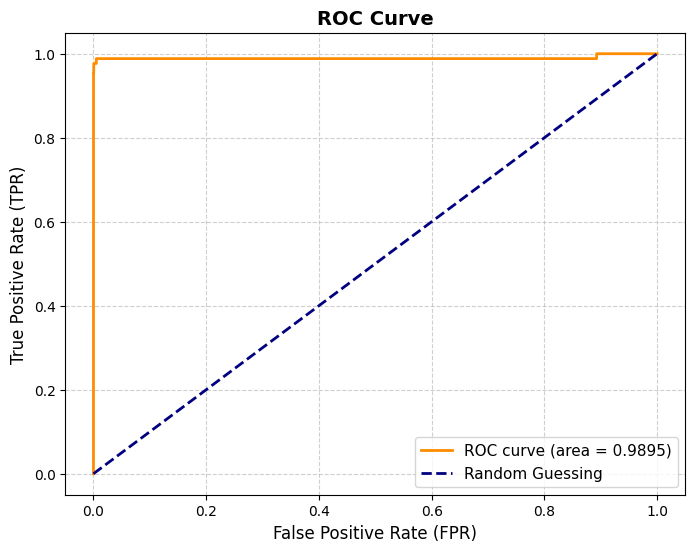

Final ROC AUC: 0.9895


In [74]:
from sklearn.metrics import roc_curve, auc

fpr_cnn_res, tpr_cnn_res, thresholds_cnn_res = roc_curve(y_test, y_pred_prob_cnn_res)
roc_auc_cnn_res = auc(fpr_cnn_res, tpr_cnn_res)

plt.figure(figsize=(8,6))
plt.plot(fpr_cnn_res, tpr_cnn_res,  color='darkorange', lw=2,
         label=f"ROC curve (area = {roc_auc_cnn_res:.4f})")
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle="--", label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('ROC Curve', fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=11)
plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig("ROC CNN res.jpg", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print(f"Final ROC AUC: {roc_auc_cnn_res:.4f}")

## Bi_LSTM

In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.metrics import AUC, Precision, Recall

model_bi_lstm_res = Sequential([
    # Layer 1: Bi-LSTM (return_sequences=True)
    Bidirectional(
        LSTM(64, return_sequences=True, 
             kernel_regularizer=l2(1e-5), 
             dropout=0.2, recurrent_dropout=0.2),
        input_shape=(X_train_cnn_res.shape[1], X_train_cnn_res.shape[2])
    ),
    BatchNormalization(),

    # Layer 2: Bi-LSTM cuối
    Bidirectional(
        LSTM(32, return_sequences=False, 
             kernel_regularizer=l2(1e-5), 
             dropout=0.2, recurrent_dropout=0.2)
    ),
    BatchNormalization(),
    Dropout(0.3),

    # Dense layers
    Dense(128, activation='relu', kernel_regularizer=l2(1e-5)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(64, activation='relu', kernel_regularizer=l2(1e-5)),
    Dropout(0.3),

    # Output layer
    Dense(1, activation='sigmoid')
], name='BiLSTM_SMOTEENN_RobustScaler')

model_bi_lstm_res.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=[
        AUC(name='auc'),
        Precision(name='precision'),
        Recall(name='recall')
    ]
)

model_bi_lstm_res.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "BiLSTM_SMOTEENN_RobustScaler"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_2 (Bidirectional) │ (None, 31, 128)        │        33,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 31, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 92,929 (363.00 KB)

 Trainable params: 92,289 (360.50 KB)

 Non-trainable params: 640 (2.50 KB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

early_stopping_bi_lstm_res = EarlyStopping(
    monitor='val_auc',          
    mode='max',                 
    patience=15,                
    restore_best_weights=True,  
    verbose=1
)

history_bi_lstm_res = model_bi_lstm_res.fit(
    X_train_cnn_res, y_train,                  
    validation_data=(X_test_cnn_res, y_test),  
    epochs=100,                                
    batch_size=2048,                           
    callbacks=[early_stopping_bi_lstm_res],              
    verbose=1
)

Epoch 1/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 48s 313ms/step - auc: 0.5310 - loss: 1.0000 - precision: 0.0018 - recall: 0.5796 - val_auc: 0.8811 - val_loss: 0.3617 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 33s 297ms/step - auc: 0.4943 - loss: 0.3023 - precision: 0.0028 - recall: 0.1899 - val_auc: 0.1670 - val_loss: 0.1177 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 33s 295ms/step - auc: 0.5201 - loss: 0.1153 - precision: 0.0050 - recall: 0.0715 - val_auc: 0.1071 - val_loss: 0.0392 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 33s 298ms/step - auc: 0.5092 - loss: 0.0628 - precision: 0.0031 - recall: 0.0151 - val_auc: 0.3282 - val_loss: 0.0226 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 33s 296ms/step - auc: 0.5667 - loss: 0.0435 - precision: 0.0053 - recall: 0.0141 - val_auc: 0.4571 - val_loss: 

1772/1772 ━━━━━━━━━━━━━━━━━━━━ 84s 46ms/step

Classification Report:
              precision    recall  f1-score   support

           0     0.9999    0.9999    0.9999     56607
           1     0.9213    0.9535    0.9371        86

    accuracy                         0.9998     56693
   macro avg     0.9606    0.9767    0.9685     56693
weighted avg     0.9998    0.9998    0.9998     56693



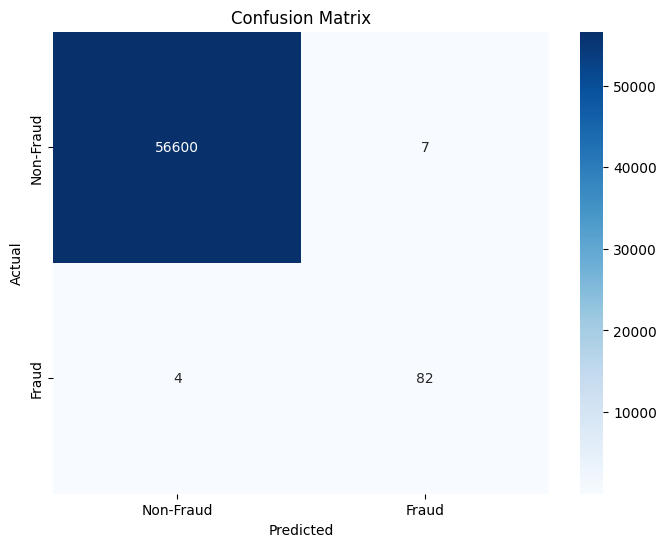

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred_prob_bi_lstm_res = model_bi_lstm_res.predict(X_test)
y_pred_bi_lstm_res = (y_pred_prob_bi_lstm_res > 0.5).astype(int)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_bi_lstm_res, digits=4))

cm_bi_lstm_res = confusion_matrix(y_test, y_pred_bi_lstm_res)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_bi_lstm_res, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.savefig("Confusion matrix Bi_LSTM Res.jpg", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

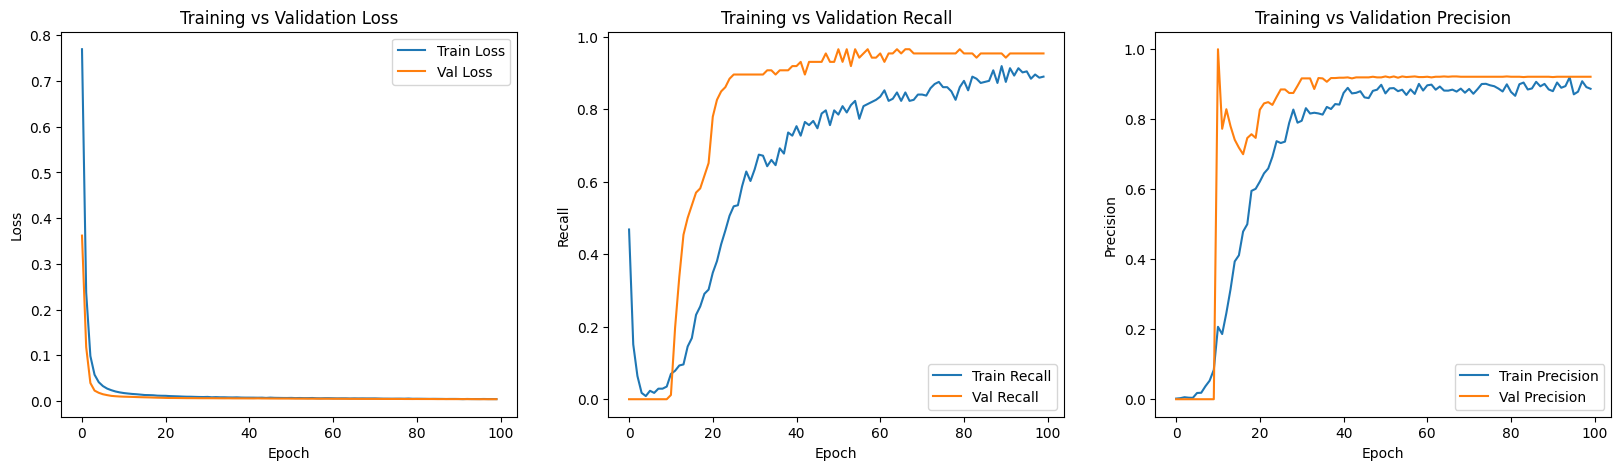

In [82]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.plot(history_bi_lstm_res.history['loss'], label="Train Loss")
plt.plot(history_bi_lstm_res.history['val_loss'], label="Val Loss")
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1,3,2)
plt.plot(history_bi_lstm_res.history['recall'], label="Train Recall")
plt.plot(history_bi_lstm_res.history['val_recall'], label="Val Recall")
plt.title("Training vs Validation Recall")
plt.xlabel("Epoch")
plt.ylabel("Recall")
plt.legend()

plt.subplot(1,3,3)
plt.plot(history_bi_lstm_res.history['precision'], label="Train Precision")
plt.plot(history_bi_lstm_res.history['val_precision'], label="Val Precision")
plt.title("Training vs Validation Precision")
plt.xlabel("Epoch")
plt.ylabel("Precision")
plt.legend()

plt.savefig("Train Val Bi_LSTM res.jpg", dpi=300, bbox_inches='tight')
plt.show()
plt.close()


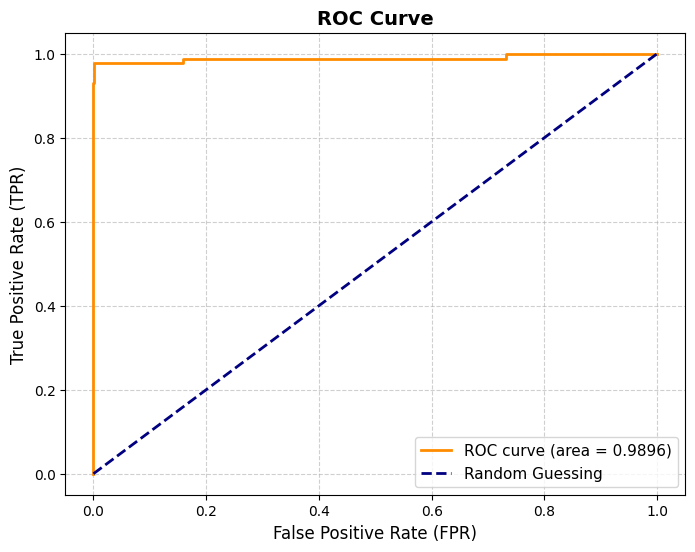

Final ROC AUC: 0.9896


In [81]:
from sklearn.metrics import roc_curve, auc

fpr_bi_lstm_res, tpr_bi_lstm_res, thresholds_bi_lstm_res = roc_curve(y_test, y_pred_prob_bi_lstm_res)
roc_auc_bi_lstm_res = auc(fpr_bi_lstm_res, tpr_bi_lstm_res)

plt.figure(figsize=(8,6))
plt.plot(fpr_bi_lstm_res, tpr_bi_lstm_res, color='darkorange', lw=2, 
         label=f'ROC curve (area = {roc_auc_bi_lstm_res:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('ROC Curve', fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=11)
plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig("ROC Bi_LSTM res.jpg", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print(f"Final ROC AUC: {roc_auc_bi_lstm_res:.4f}")


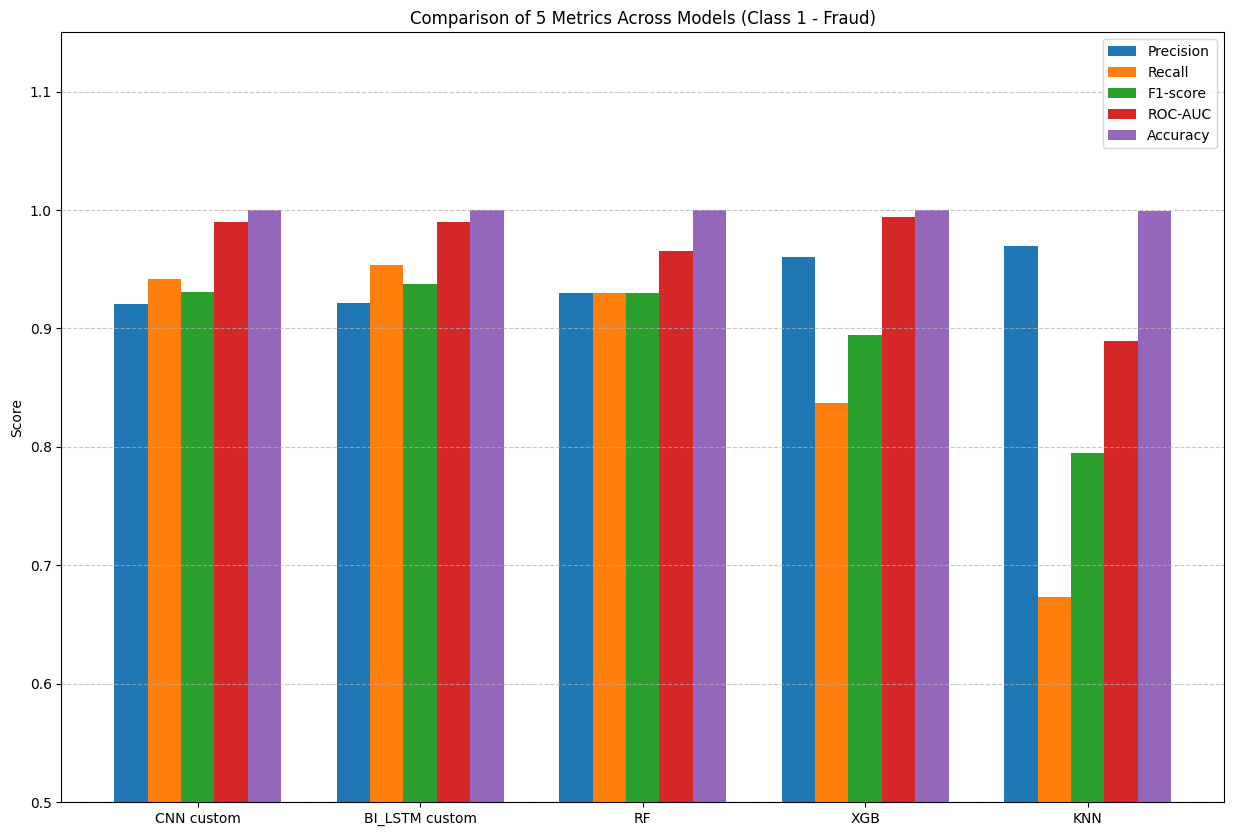

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score

def get_positive_key(report_dict):
    for k in report_dict.keys():
        if str(k).startswith("1"):
            return k
    raise KeyError("Không tìm thấy key class 1 trong classification_report")

report_cnn_res = classification_report(y_test, y_pred_cnn_res, output_dict=True)
key_cnn = get_positive_key(report_cnn_res)

cnn_scores_res = [
    report_cnn_res[key_cnn]['precision'],
    report_cnn_res[key_cnn]['recall'],
    report_cnn_res[key_cnn]['f1-score'],
    roc_auc_score(y_test, y_pred_prob_cnn_res),
    accuracy_score(y_test, y_pred_cnn_res)
]


report_bi_lstm_res = classification_report(y_test, y_pred_bi_lstm_res, output_dict=True)
key_bilstm = get_positive_key(report_bi_lstm_res)

bi_lstm_scores_res = [
    report_bi_lstm_res[key_bilstm]['precision'],
    report_bi_lstm_res[key_bilstm]['recall'],
    report_bi_lstm_res[key_bilstm]['f1-score'],
    roc_auc_score(y_test, y_pred_prob_bi_lstm_res),
    accuracy_score(y_test, y_pred_bi_lstm_res)
]


report_rf_res = classification_report(y_test, y_pred_rf_res, output_dict=True)
key_rf = get_positive_key(report_rf_res)

rf_scores_res = [
    report_rf_res[key_rf]['precision'],
    report_rf_res[key_rf]['recall'],
    report_rf_res[key_rf]['f1-score'],
    roc_auc_score(y_test, y_pred_prob_rf_res),
    accuracy_score(y_test, y_pred_rf_res)
]


report_ada_res = classification_report(y_test, y_pred_ada_res, output_dict=True)
key_ada = get_positive_key(report_ada_res)

ada_scores_res = [
    report_ada_res[key_ada]['precision'],
    report_ada_res[key_ada]['recall'],
    report_ada_res[key_ada]['f1-score'],
    roc_auc_score(y_test, y_pred_prob_ada_res),
    accuracy_score(y_test, y_pred_ada_res)
]


report_xgb_res = classification_report(y_test, y_pred_xgb_res, output_dict=True)
key_xgb = get_positive_key(report_xgb_res)

xgb_scores_res = [
    report_xgb_res[key_xgb]['precision'],
    report_xgb_res[key_xgb]['recall'],
    report_xgb_res[key_xgb]['f1-score'],
    roc_auc_score(y_test, y_pred_prob_xgb_res),
    accuracy_score(y_test, y_pred_xgb_res)
]


report_knn_res = classification_report(y_test, y_pred_knn_res, output_dict=True)
key_knn = get_positive_key(report_knn_res)

knn_scores_res = [
    report_knn_res[key_knn]['precision'],
    report_knn_res[key_knn]['recall'],
    report_knn_res[key_knn]['f1-score'],
    roc_auc_score(y_test, y_pred_prob_knn_res),
    accuracy_score(y_test, y_pred_knn_res)
]


metrics = ["Precision", "Recall", "F1-score", "ROC-AUC", "Accuracy"]

scores = np.array([
    cnn_scores_res,
    bi_lstm_scores_res,
    rf_scores_res,
    xgb_scores_res,
    knn_scores
])

models = ["CNN custom", "BI_LSTM custom", "RF", "XGB", "KNN"]

x = np.arange(len(models))
width = 0.15

plt.figure(figsize=(15,10))
for i in range(len(metrics)):
    plt.bar(x + i*width - 2*width, scores[:, i], width, label=metrics[i])

plt.xticks(x, models)
plt.ylim(0.5, 1.15)
plt.ylabel("Score")
plt.title("Comparison of 5 Metrics Across Models (Class 1 - Fraud)")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


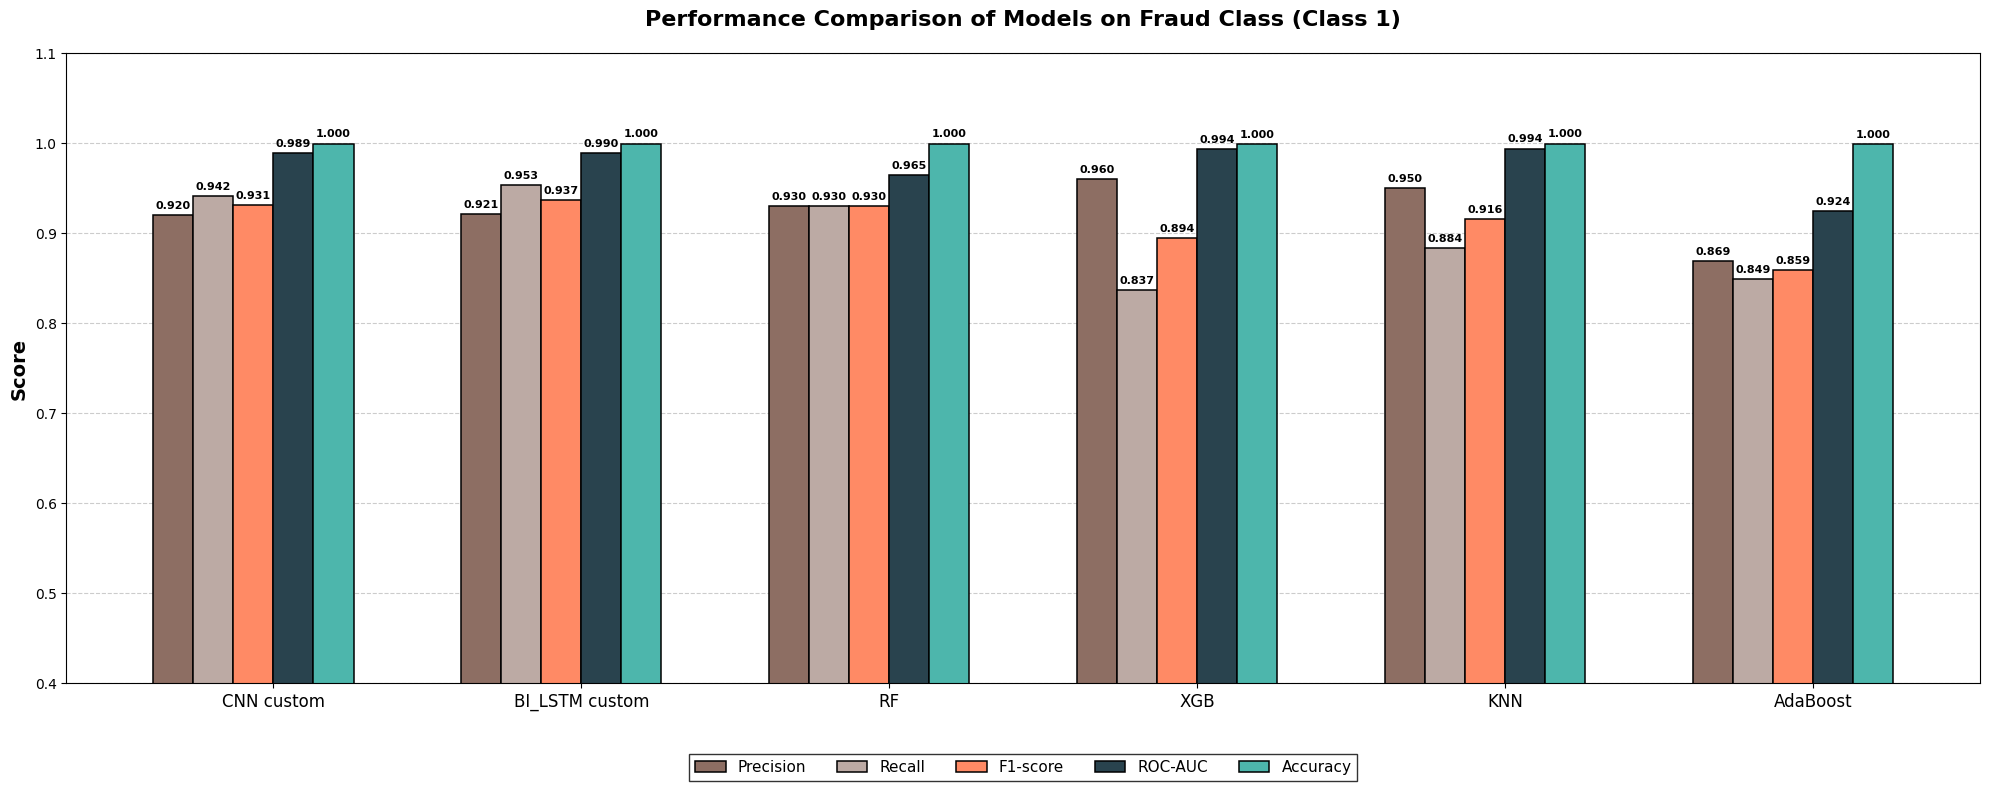

In [ ]:

metrics = ["Precision", "Recall", "F1-score", "ROC-AUC", "Accuracy"]

scores = np.array([
    cnn_scores_res,
    bi_lstm_scores_res,
    rf_scores_res,
    xgb_scores_res,
    knn_scores_res,
    ada_scores_res 
])

models = ["CNN custom", "BI_LSTM custom", "RF", "XGB", "KNN", "AdaBoost"] 

x = np.arange(len(models))
width = 0.13 

plt.figure(figsize=(20, 8)) 

custom_colors = [
    '#8D6E63',
    '#BCAAA4',
    '#FF8A65',
    '#29434E',
    '#4DB6AC',
]

for i, (metric, color) in enumerate(zip(metrics, custom_colors)):
    bars = plt.bar(x + i*width - 2.5*width, scores[:, i], width,
                   label=metric, color=color, edgecolor='black', linewidth=1.1)

    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.005,
                 f'{height:.3f}', ha='center', va='bottom',
                 fontsize=8, fontweight='bold') 

plt.xticks(x, models, fontsize=12)
plt.ylim(0.4, 1.1) 
plt.ylabel('Score', fontsize=14, fontweight='bold')
plt.title('Performance Comparison of Models on Fraud Class (Class 1)',
          fontsize=16, fontweight='bold', pad=20)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=len(metrics), fontsize=11, frameon=True, fancybox=False, edgecolor='black')

plt.grid(axis='y', linestyle='--', alpha=0.4, color='gray')
plt.gca().set_axisbelow(True)
plt.tight_layout()

plt.savefig("Compare Model(Ba.jpg", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

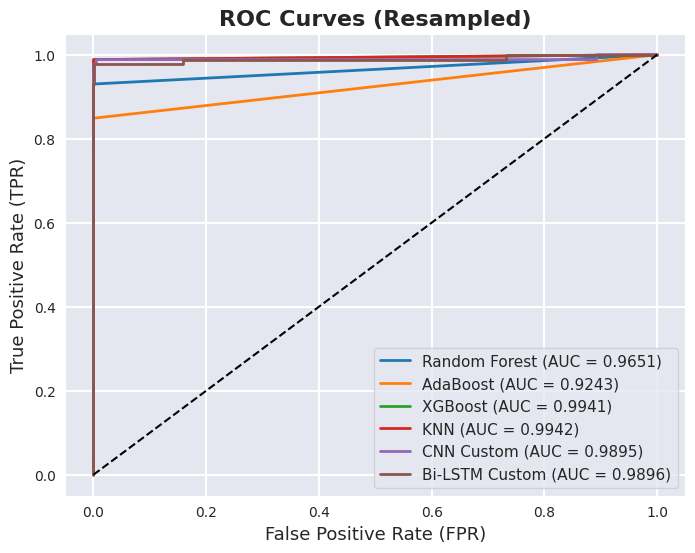

In [ ]:
sns.set_style("darkgrid")  

plt.rcParams['axes.facecolor'] = '#E5E7F0'      
plt.rcParams['grid.color'] = 'white'            
plt.rcParams['grid.alpha'] = 1.0                

plt.figure(figsize=(8, 6))

plt.plot(fpr_rf_res, tpr_rf_res, lw=2,
         label=f"Random Forest (AUC = {roc_auc_rf_res:.4f})")

plt.plot(fpr_ada_res, tpr_ada_res, lw=2,
         label=f"AdaBoost (AUC = {roc_auc_ada_res:.4f})")

plt.plot(fpr_xgb_res, tpr_xgb_res, lw=2,
         label=f"XGBoost (AUC = {roc_auc_xgb_res:.4f})")

plt.plot(fpr_knn_res, tpr_knn_res, lw=2,
         label=f"KNN (AUC = {roc_auc_knn_res:.4f})")

plt.plot(fpr_cnn_res, tpr_cnn_res, lw=2,
         label=f"CNN Custom (AUC = {roc_auc_cnn_res:.4f})")

plt.plot(fpr_bi_lstm_res, tpr_bi_lstm_res, lw=2,
         label=f"Bi-LSTM Custom (AUC = {roc_auc_bi_lstm_res:.4f})")

plt.plot([0, 1], [0, 1], color='black', lw=1.5, linestyle='--')

plt.xlabel('False Positive Rate (FPR)', fontsize=13)
plt.ylabel('True Positive Rate (TPR)', fontsize=13)
plt.title('ROC Curves (Resampled)', fontsize=16, fontweight='bold')
plt.legend(loc="lower right", fontsize=11)
plt.grid(True, alpha=1.0, linewidth=1.5) 


plt.savefig("ROC_6_models_res.jpg", dpi=300, bbox_inches='tight')
plt.show()
plt.close()